In [1]:
import pandas as pd
loan_default_df = pd.read_csv("application.csv")
loan_default_df 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,406895,0,Cash loans,F,Y,Y,1,112500.0,406597.5,31594.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15372,376623,0,Cash loans,F,N,Y,0,112500.0,254700.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
15373,273086,0,Cash loans,M,N,Y,0,121360.5,1080000.0,29700.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
15374,160442,0,Cash loans,F,Y,Y,0,90000.0,526491.0,32337.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [39]:
loan_default_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
loan_default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15376 entries, 0 to 15375
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(43), object(16)
memory usage: 14.3+ MB


Checking for missing values

In [47]:
loan_default_df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     2022
AMT_REQ_CREDIT_BUREAU_WEEK    2022
AMT_REQ_CREDIT_BUREAU_MON     2022
AMT_REQ_CREDIT_BUREAU_QRT     2022
AMT_REQ_CREDIT_BUREAU_YEAR    2022
Length: 122, dtype: int64

In [9]:
(loan_default_df.isnull().sum() * 100) / loan_default_df.shape[0]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.150364
AMT_REQ_CREDIT_BUREAU_WEEK    13.150364
AMT_REQ_CREDIT_BUREAU_MON     13.150364
AMT_REQ_CREDIT_BUREAU_QRT     13.150364
AMT_REQ_CREDIT_BUREAU_YEAR    13.150364
Length: 122, dtype: float64

In [11]:
categorical_columns = loan_default_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [51]:
loan_default_df['TARGET'] = loan_default_df['TARGET'].astype(object)

In [52]:
loan_default_df.describe(include=['object']).T

,count,unique,top,freq
TARGET,15376,2,0,14122
NAME_CONTRACT_TYPE,15376,2,Cash loans,13939
CODE_GENDER,15376,2,F,10219
FLAG_OWN_CAR,15376,2,N,10179
FLAG_OWN_REALTY,15376,2,Y,10466
NAME_TYPE_SUITE,15376,7,Unaccompanied,12490
NAME_INCOME_TYPE,15376,6,Working,8036
NAME_EDUCATION_TYPE,15376,5,Secondary / secondary special,10881
NAME_FAMILY_STATUS,15376,6,Married,9759
NAME_HOUSING_TYPE,15376,6,House / apartment,13589


Insights

TARGET has only 2 values: the value 0 which means the client has not defaulted and has a frequency of over 90%. This means the other 20% of clients have defaulted at least once.
Around 66% (~2/3) of clients are females and a majority of the clients do not own a car.
Most of the clients applied for Cash Loans.

Let's look at the unique values in all the categorical variables

In [18]:
for col in categorical_columns:
    print(loan_default_df[col].value_counts())
    print('*'* 40)
    

NAME_CONTRACT_TYPE
Cash loans         13939
Revolving loans     1437
Name: count, dtype: int64
****************************************
CODE_GENDER
F    10219
M     5157
Name: count, dtype: int64
****************************************
FLAG_OWN_CAR
N    10179
Y     5197
Name: count, dtype: int64
****************************************
FLAG_OWN_REALTY
Y    10466
N     4910
Name: count, dtype: int64
****************************************
NAME_TYPE_SUITE
Unaccompanied      12423
Family              2036
Spouse, partner      549
Children             166
Other_B               94
Other_A               31
Group of people       10
Name: count, dtype: int64
****************************************
NAME_INCOME_TYPE
Working                 8036
Commercial associate    3562
Pensioner               2711
State servant           1064
Student                    2
Maternity leave            1
Name: count, dtype: int64
****************************************
NAME_EDUCATION_TYPE
Secondary / secondar

In [73]:
numerical_columns = loan_default_df.select_dtypes(include= ['number']).columns
numerical_columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [74]:
loan_default_df[numerical_columns].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,15376.000000,15376.000000,1.537600e+04,1.537600e+04,15376.000000,1.537600e+04,15376.000000,15376.000000,15376.000000,15376.000000,...,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000
mean,277931.605619,0.425989,1.758758e+05,5.985502e+05,27075.985204,5.375487e+05,0.020977,-16033.042729,62437.988033,-4966.477367,...,0.008650,0.000585,0.000520,0.000520,0.006113,0.006829,0.029071,0.240570,0.224181,1.761186
std,102224.492619,0.731266,9.470044e+05,4.026963e+05,14492.723251,3.690067e+05,0.014001,4363.268363,140116.572935,3535.517723,...,0.092604,0.024187,0.022805,0.022805,0.084363,0.117503,0.178158,0.885479,0.568796,1.765783
min,100004.000000,0.000000,2.700000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25197.000000,-16607.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190073.500000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19630.000000,-2770.000000,-7459.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278047.000000,0.000000,1.485000e+05,5.129978e+05,24885.000000,4.500000e+05,0.018850,-15736.500000,-1213.000000,-4483.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366538.000000,1.000000,2.025000e+05,8.086500e+05,34488.000000,6.795000e+05,0.028663,-12379.500000,-294.000000,-1939.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456247.000000,7.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7694.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,8.000000,5.000000,17.000000,5.000000,18.000000


Insights

1. All numerical variables have big outliers (max values) compared to their mean.
2. The big outliers of the variables AMT_INCOME_TOTAL, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON and AMT_ANNUITY means there are a few    persons who receive very big loans compared to the majority.

Filling missing values in numerical columns with median and mode in categorical variables

In [63]:
# Selecting string and object columns.
# Filling object columns with mode.
for i in categorical_columns:
    mode = loan_default_df[i].mode()[0]
    loan_default_df.fillna({i : loan_default_df[i].mode()[0]}, inplace=True)

In [62]:
loan_default_df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [75]:
for i in numerical_columns:
    loan_default_df.fillna({i : loan_default_df[i].median()}, inplace = True)

In [76]:
loan_default_df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

EXPLORATORY DATA ANALYSIS 

Univariate Analysis - Categorical Data

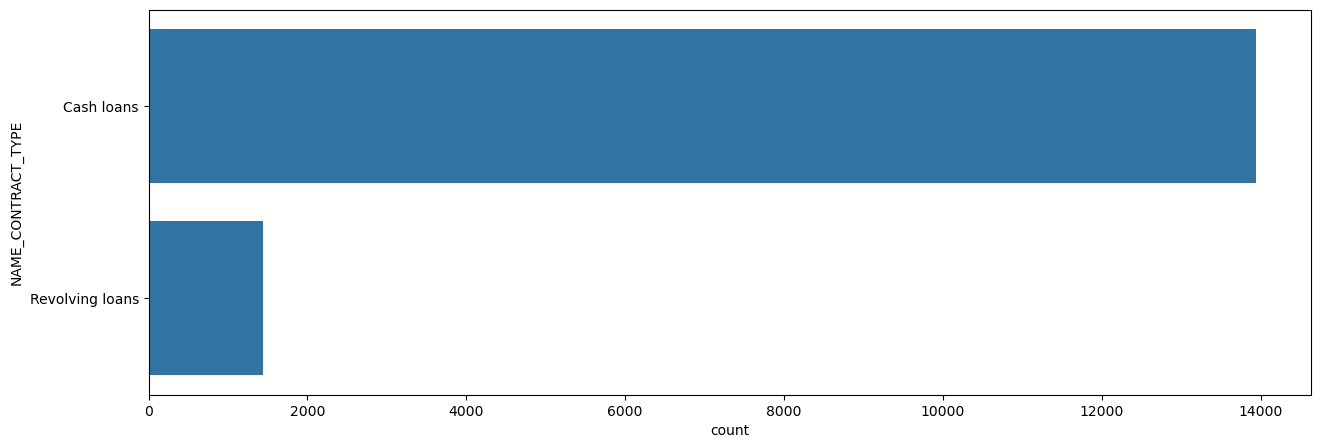

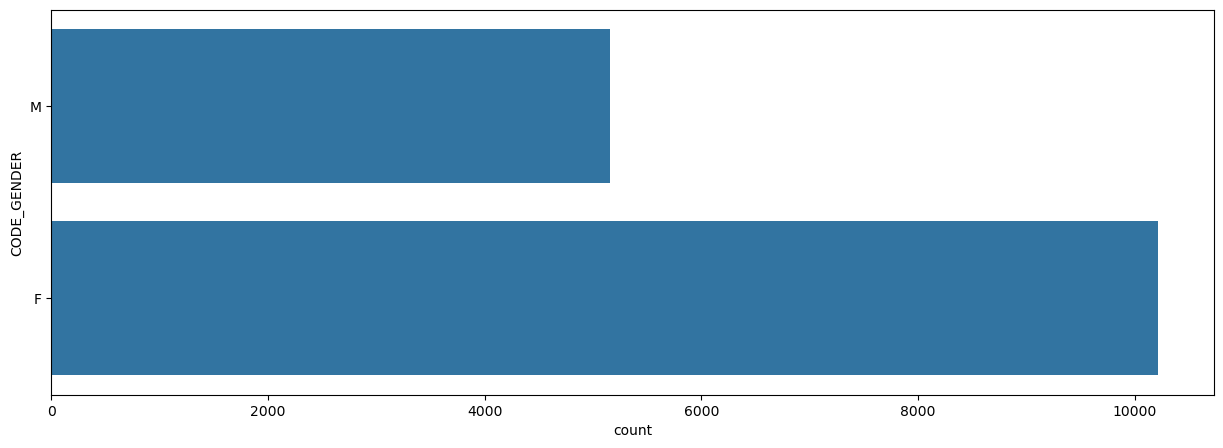

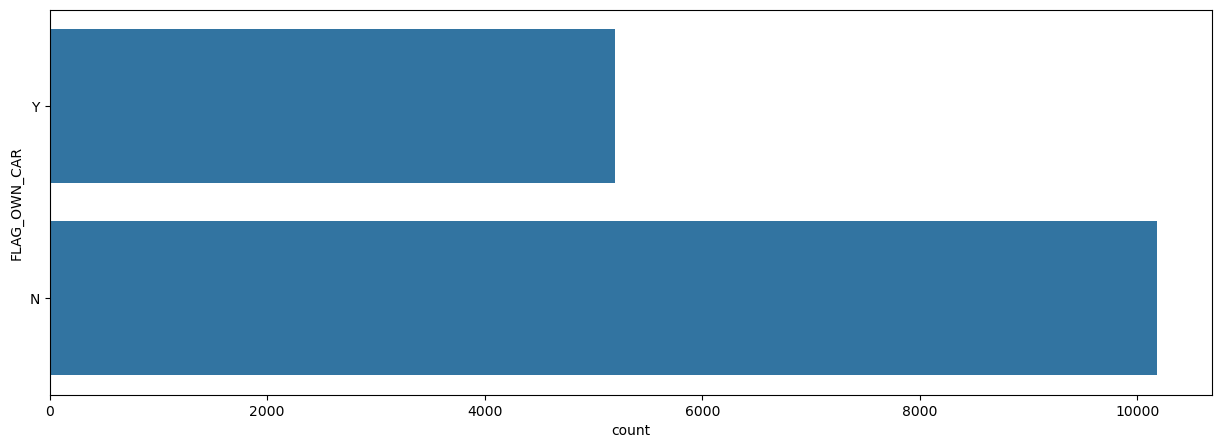

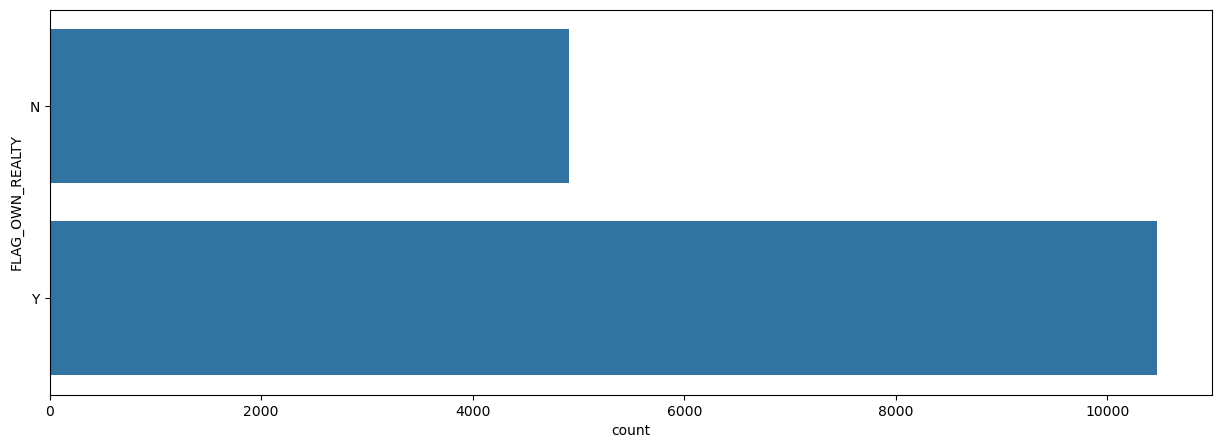

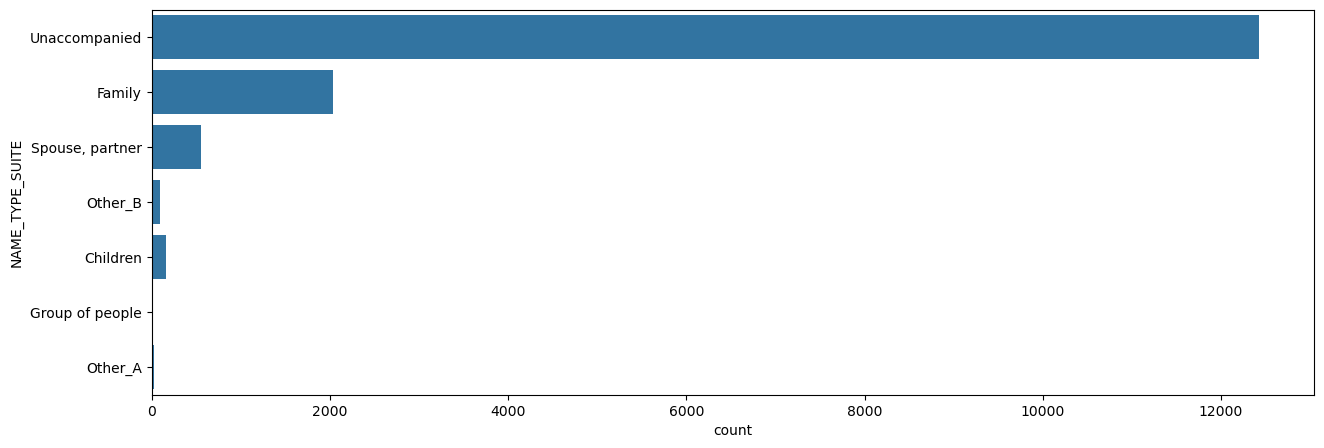

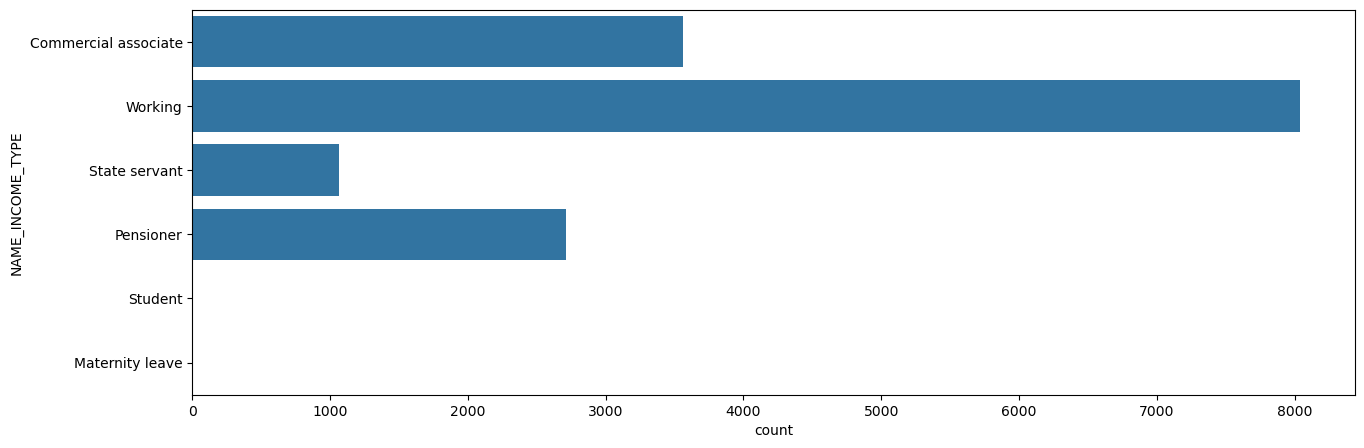

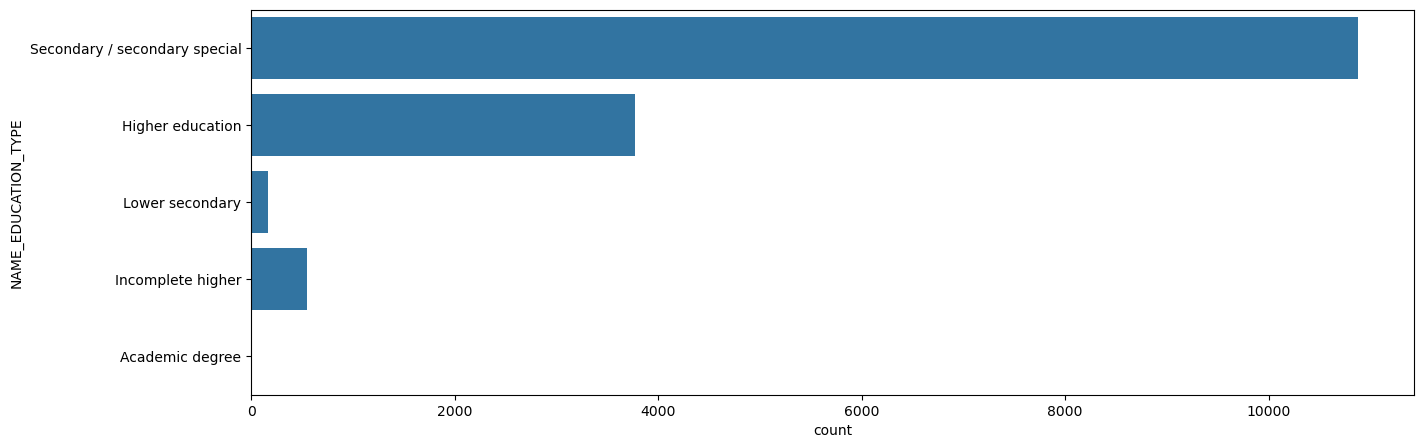

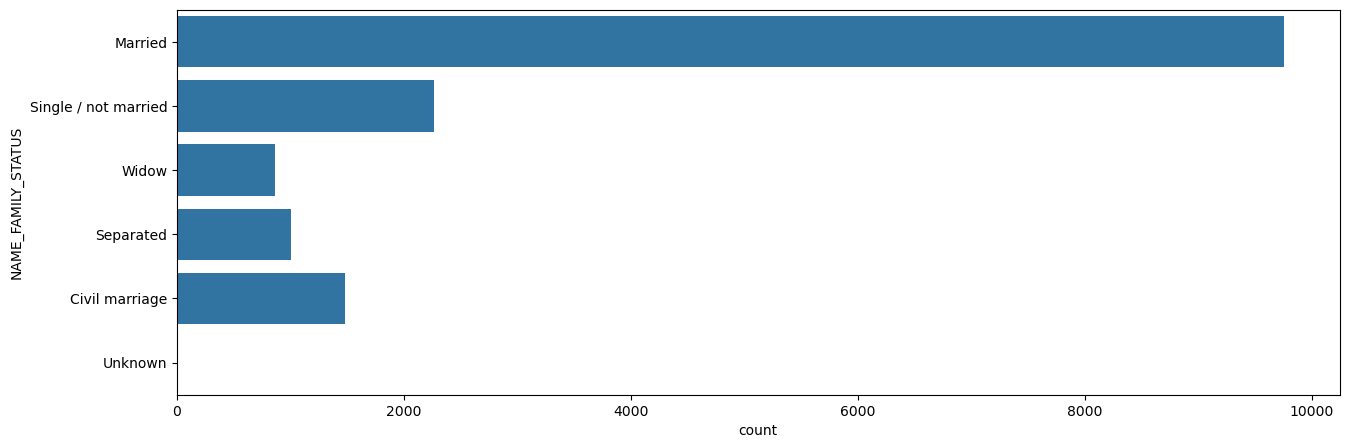

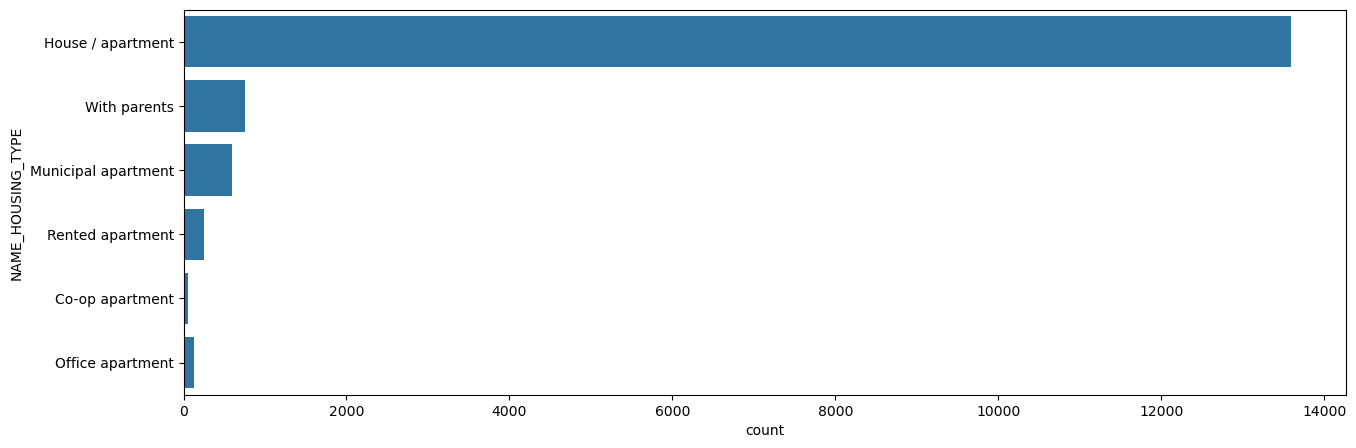

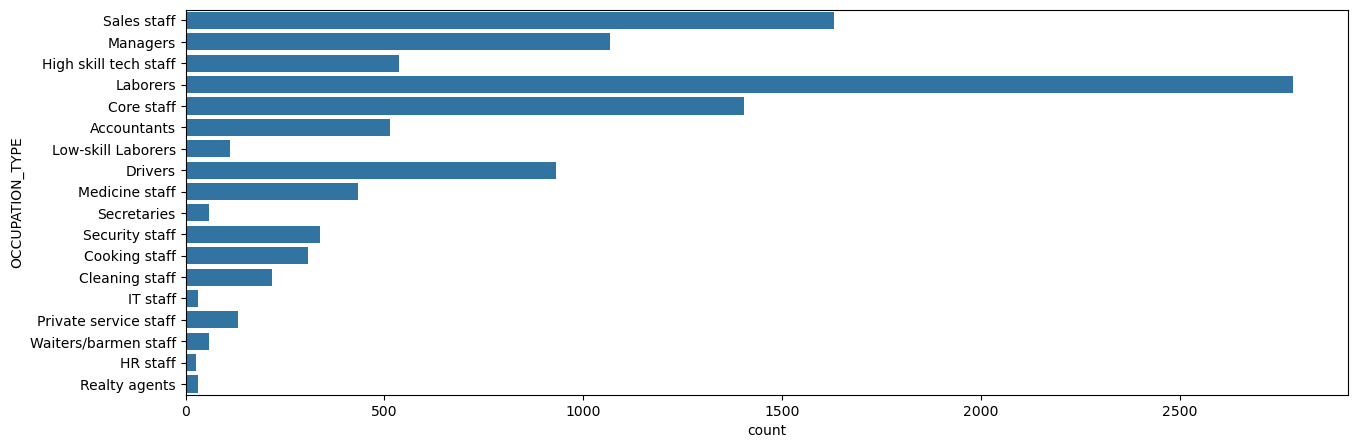

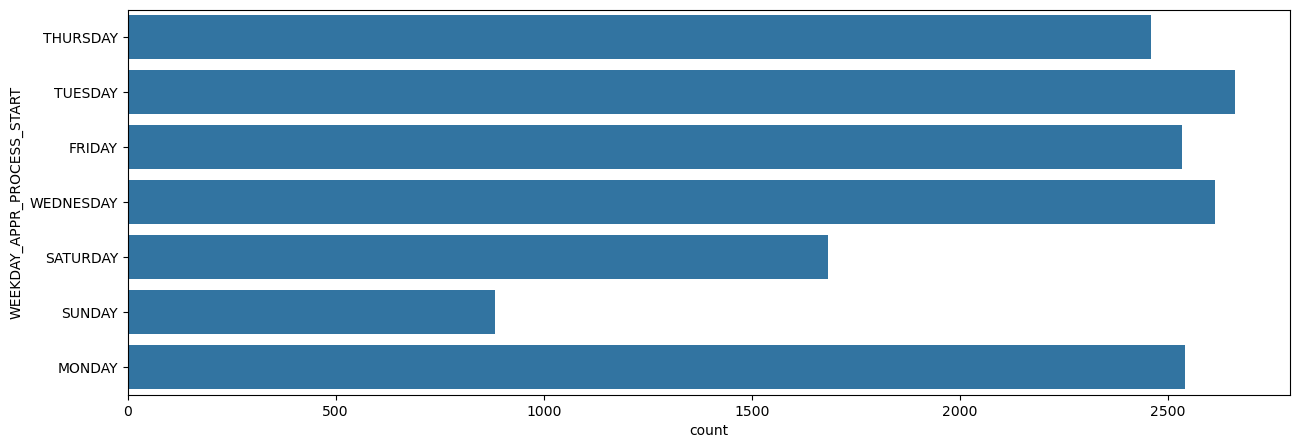

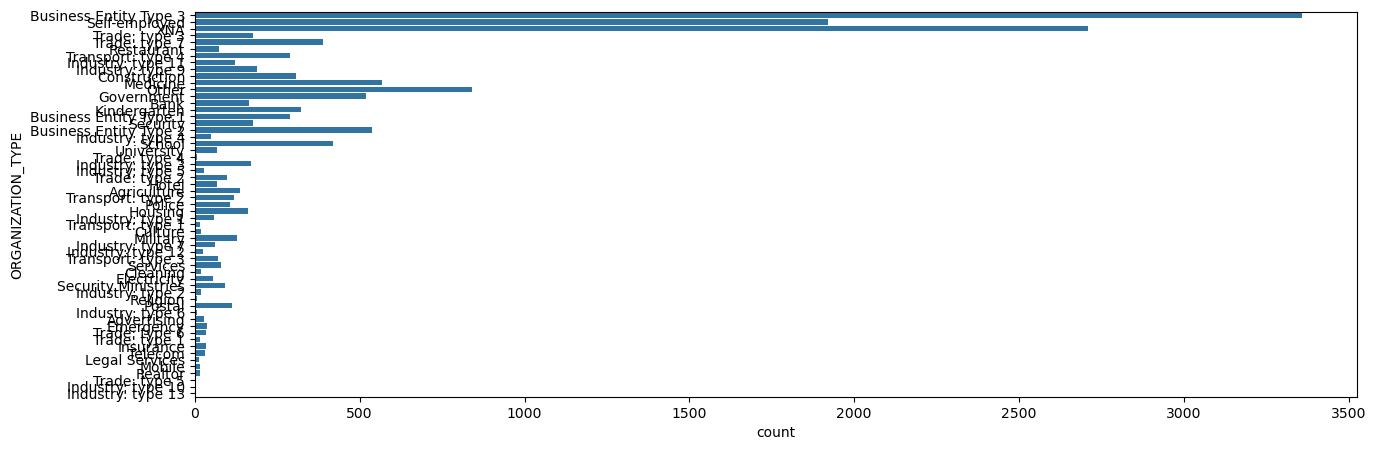

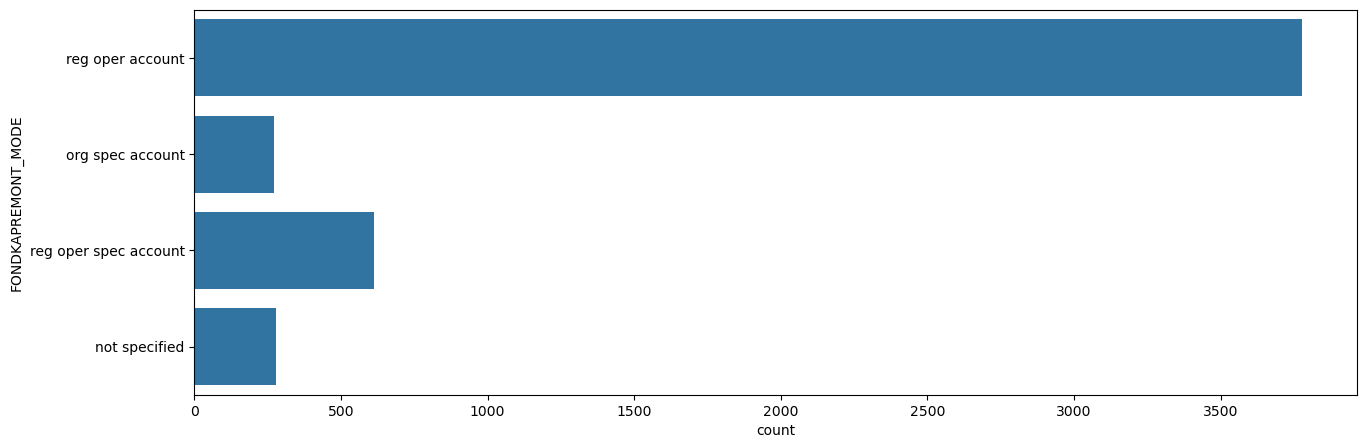

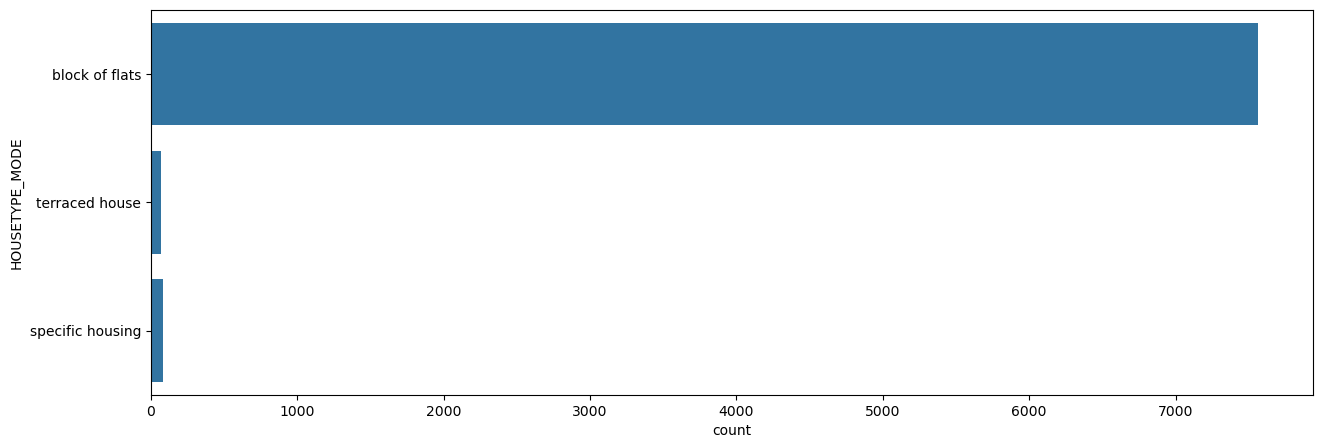

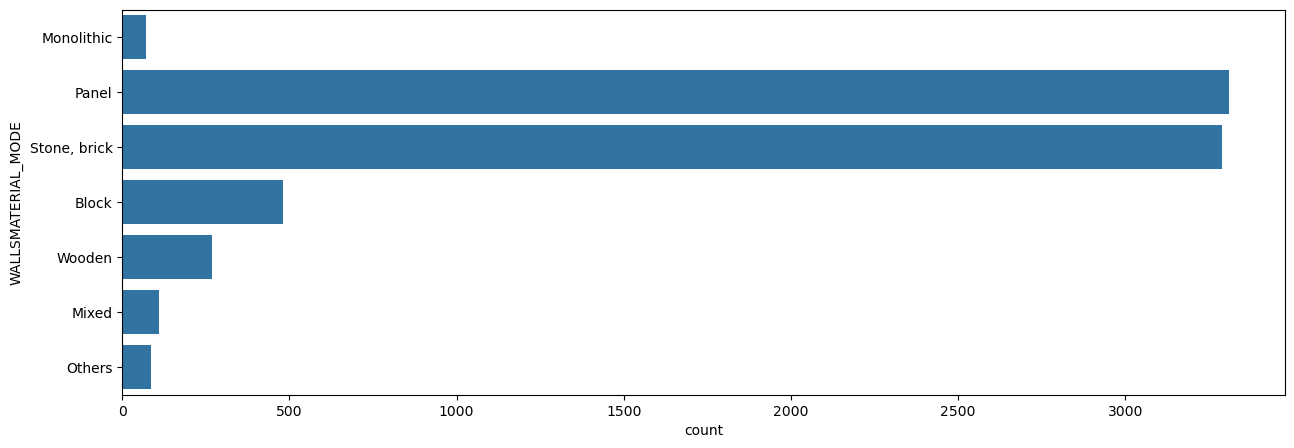

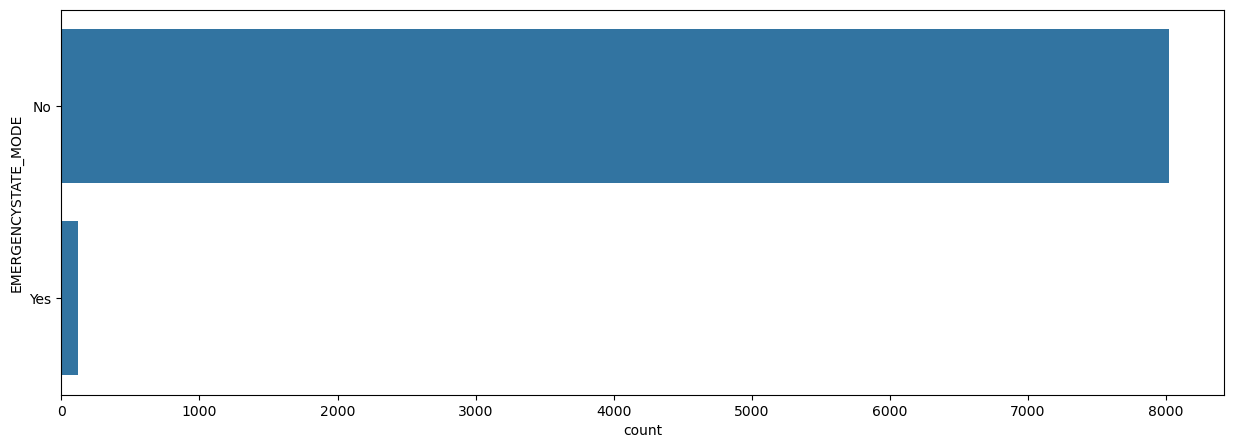

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in categorical_columns:
    plt.figure(figsize=(15,5))
    sns.countplot(loan_default_df[i])

Bivariate Analysis - Numerical Data

Analyzing TARGET Vs Numerical Columns

<Axes: xlabel='TARGET', ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

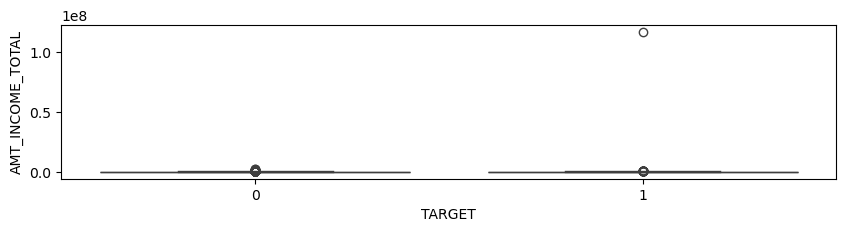

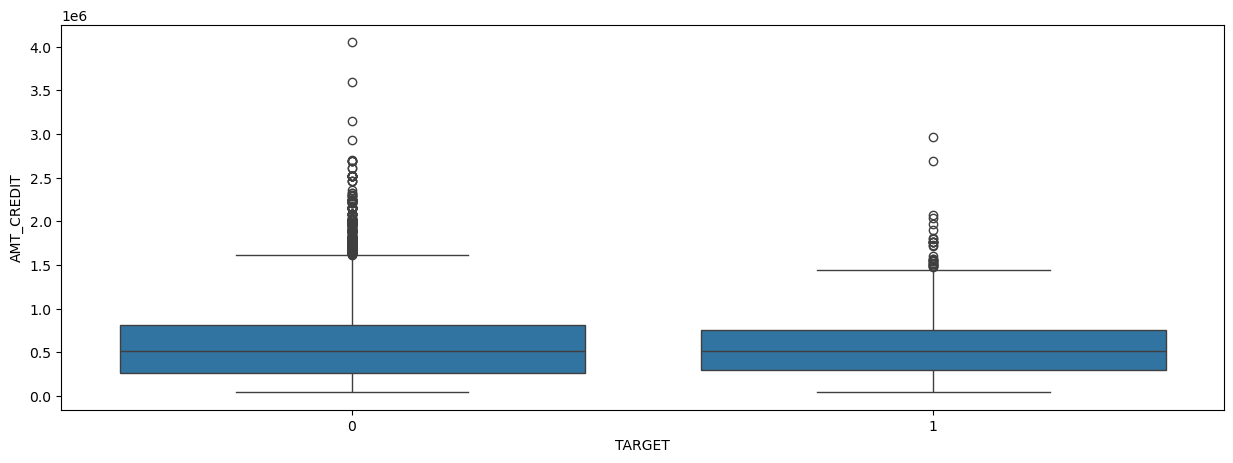

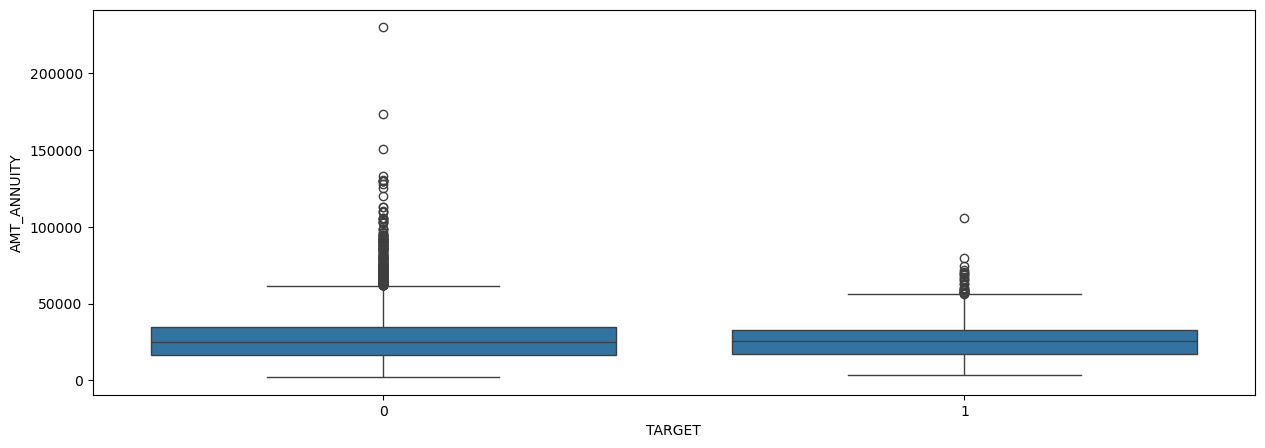

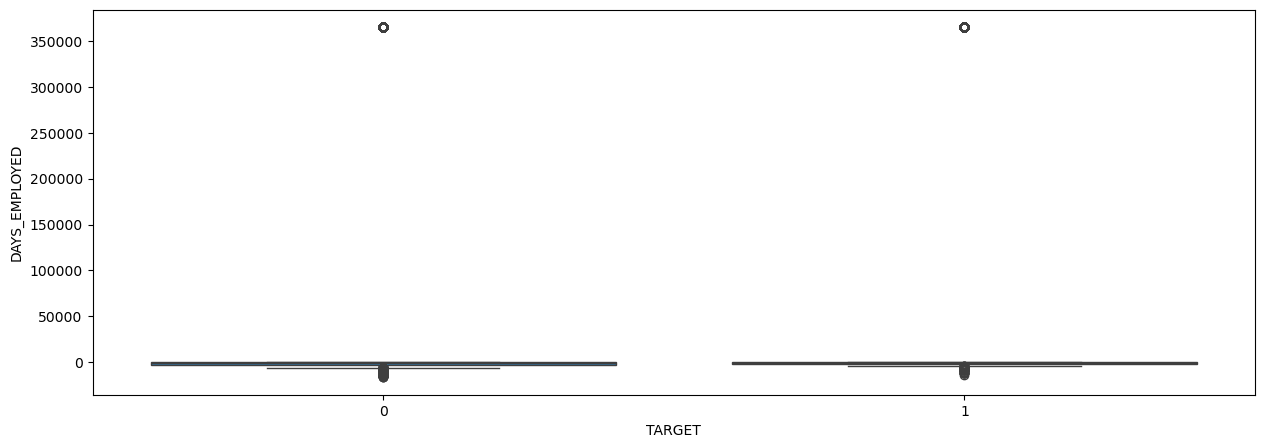

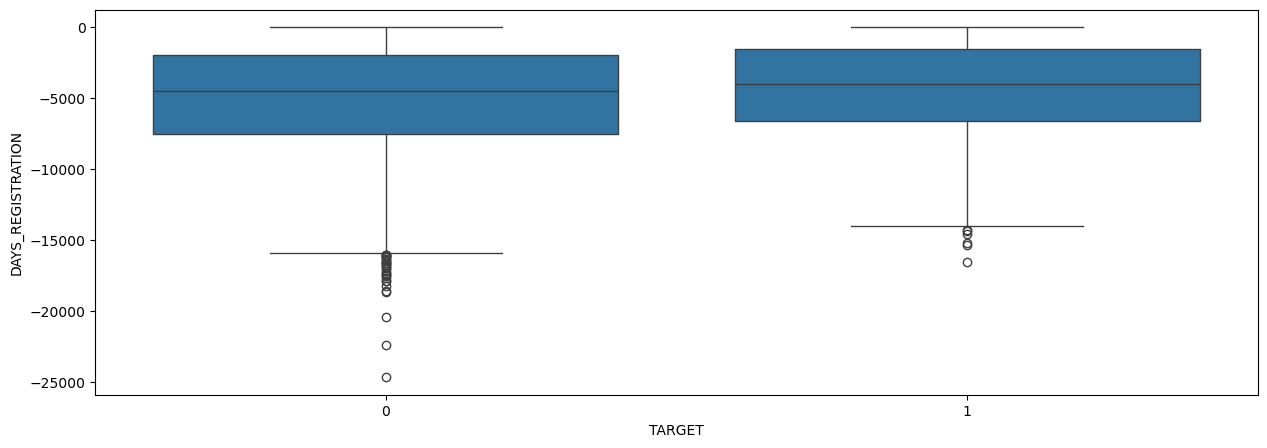

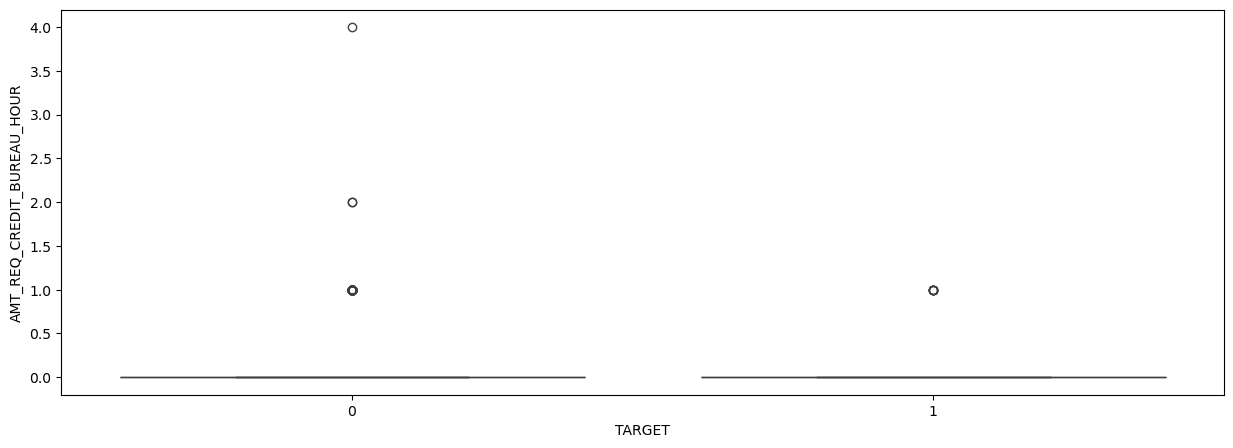

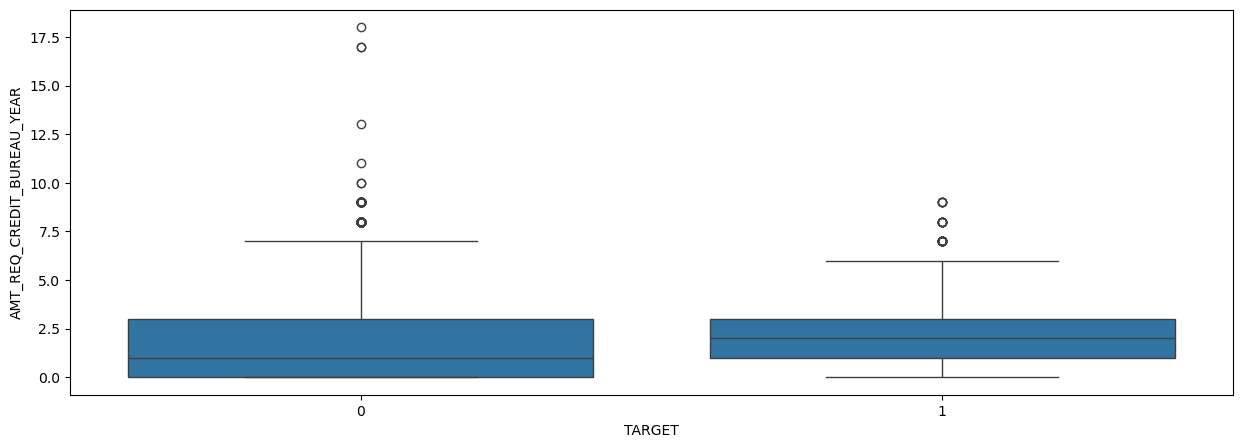

In [53]:

plt.figure(figsize=(10,2))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['AMT_INCOME_TOTAL']) 

plt.figure(figsize=(15,5))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['AMT_CREDIT']) 

plt.figure(figsize=(15,5))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['AMT_ANNUITY'])

plt.figure(figsize=(15,5))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['DAYS_EMPLOYED'])

plt.figure(figsize=(15,5))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['DAYS_REGISTRATION'])

plt.figure(figsize=(15,5))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['AMT_REQ_CREDIT_BUREAU_HOUR'])

plt.figure(figsize=(15,5))
sns.boxplot(x = loan_default_df['TARGET'], y = loan_default_df['AMT_REQ_CREDIT_BUREAU_YEAR'])



Insights:

Analyzing the probability of loan default based on the gender of the applicant

In [37]:
#Calculate the total number of applicants 
total_applicants = len(loan_default_df)
#P(Default| Female)
female_applicants = loan_default_df[loan_default_df['CODE_GENDER'] == 'F'].shape[0]
p_default_female_applicants = loan_default_df[loan_default_df['TARGET'] == 1].shape[0] / female_applicants
p_default_female_applicants

0.12271259418729817

In [50]:
#P(Default| Male)
Male_applicants = loan_default_df[loan_default_df['CODE_GENDER'] == 'M'].shape[0]
p_default_Male_applicants = loan_default_df[loan_default_df['TARGET'] == 1].shape[0] / Male_applicants
p_default_Male_applicants

0.24316463059918558

In [54]:
#P(Default and Female)
female_and_default = loan_default_df[loan_default_df['TARGET'] == 1].shape[0] & loan_default_df[loan_default_df['CODE_GENDER'] == 'F'].shape[0] 
p_female_and_default = female_and_default / total_applicants
p_female_and_default

0.0812955254942768

In [55]:
#P(Default and Male)
Male_and_default = loan_default_df[loan_default_df['TARGET'] == 1].shape[0] & loan_default_df[loan_default_df['CODE_GENDER'] == 'M'].shape[0] 
p_male_and_default = Male_and_default / total_applicants
p_male_and_default

0.06893860561914672

Identifying columns with outliers out of the three columns

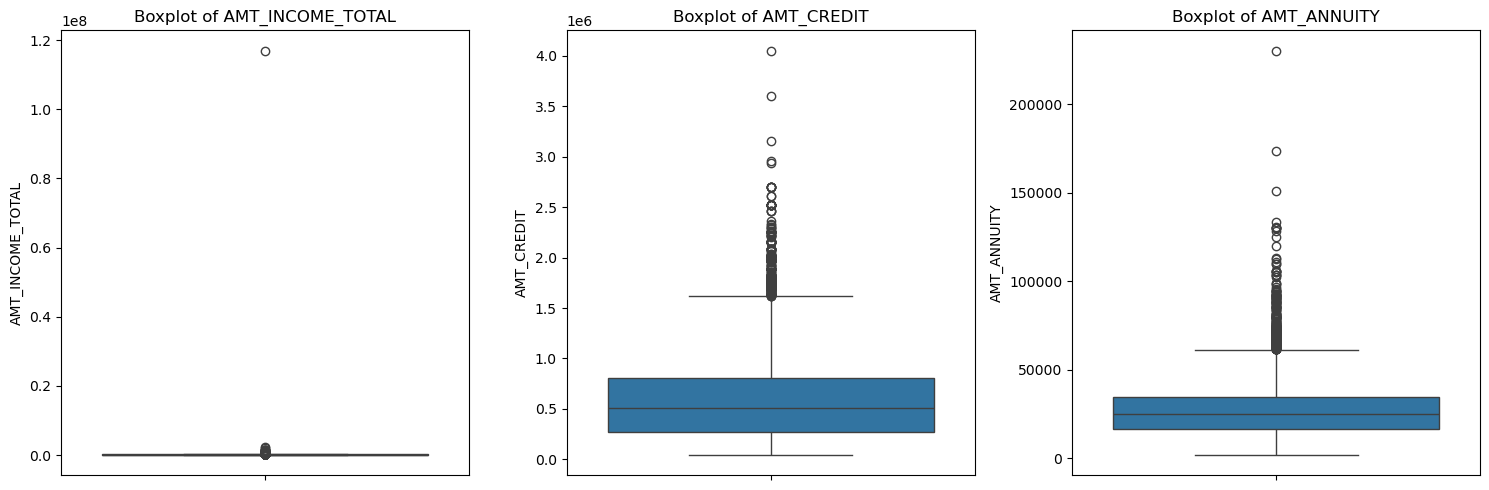

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
 # Part 1: Visualize Outliers
def visualize_outliers(loan_default_df, columns):
    plt.figure(figsize=(15, 5))
    for i, column in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=loan_default_df[column])
        plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()
 # Visualize outliers in the specified columns
columns_to_check = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
visualize_outliers(loan_default_df, columns_to_check)

Filtering the dataframe from outliers

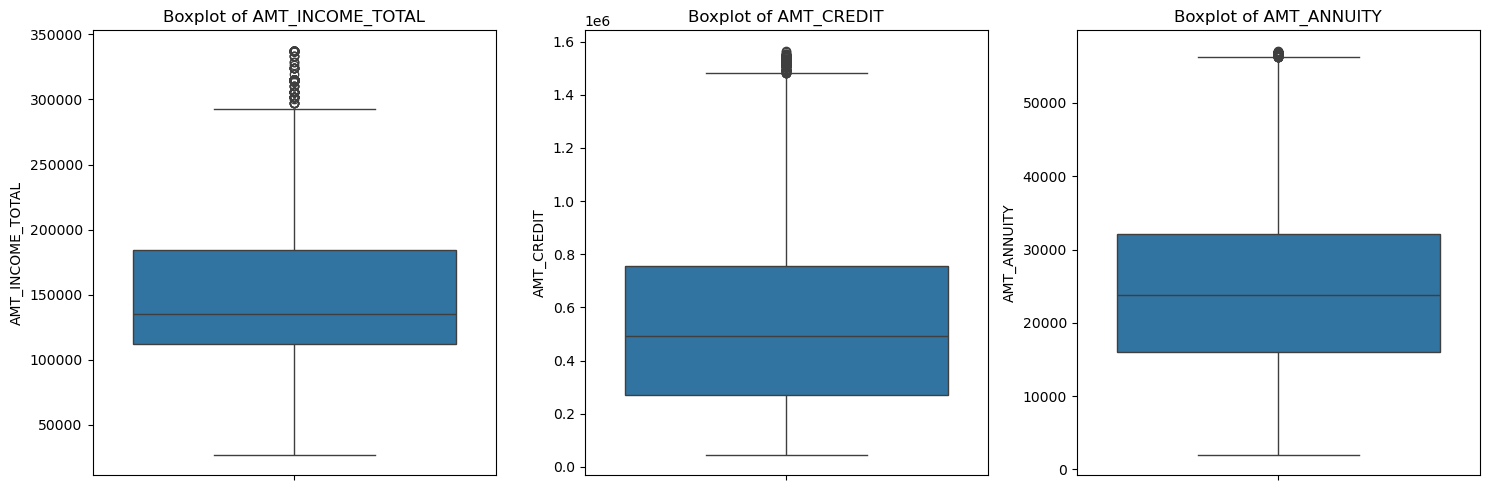

In [29]:
#Removing outliers using IQR method
def remove_outliers_iqr(loan_default_df, columns):
    for column in columns:
        Q1 = loan_default_df[column].quantile(0.25)
        Q3 = loan_default_df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        loan_default_df = loan_default_df[(loan_default_df[column] >= lower_bound) & (loan_default_df[column] <= upper_bound)]
    return loan_default_df
# Remove outliers in the specified columns
loan_default_df_cleaned = remove_outliers_iqr(loan_default_df, columns_to_check)
# Re-visualize the cleaned data
visualize_outliers(loan_default_df_cleaned, columns_to_check)

To determine if mean of 'AMT_INCOME_TOTAL' is significantly different from the hypothesized population mean 

In [4]:
from scipy.stats import ttest_1samp
#Consider  a hypothesized population mean 
hypothesized_population_mean = 100000
#Calculate t-stats and p-value for the column
t_stat, p_value = ttest_1samp(loan_default_df['AMT_INCOME_TOTAL'], hypothesized_population_mean)
print(f't-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')

#Check for hypothesis testing
if p_value < 0.05:
    print(" Null Hypothesis is rejected: The average 'AMT_INCOME_TOTAL' is significantly different from the hypothesized mean 100000 ")
else:
    print("Failed to reject the Null Hypothesis : The average 'AMT_INCOME_TOTAL' is not significantly different from the hypothesized mean 100000 ")
    

t-statistic = 9.9351, p-value = 0.0000
 Null Hypothesis is rejected: The average 'AMT_INCOME_TOTAL' is significantly different from the hypothesized mean 100000 


To determine if there is an association between gender and loan_default using chi-square test distribution

In [5]:
from scipy.stats import chi2_contingency
#Create a contingency table for gender and target
contingency_table = pd.crosstab(loan_default_df['CODE_GENDER'], loan_default_df['TARGET'])
#Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'chi2-statistic = {chi2_stat:.4f}, p-value = {p_value:.4f}')

#Check for hypothesis testing
if p_value < 0.05:
    print("Null Hypothesis is rejected: Gender and Loan default are significantly associated")
else:
    print("Failed to reject the Null Hypothesis : No significant association between gender and loan default")
    

chi2-statistic = 67.7852, p-value = 0.0000
Null Hypothesis is rejected: Gender and Loan default are significantly associated


Data Preparation

Separating the target variable from other variables

Create a train Test Split

30% of observations will be set aside for the test set

the rest, 70%, will be used as the training set

In [5]:
import pandas as pd
X = loan_default_df[['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]
Y = loan_default_df['TARGET']
# Convert continuous labels to discrete classes
Y = [int(label) for label in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

Building a Logistic Regression Model

Logistic Regression is a supervised learning algorithm, generally used for binary classification problems, i.e., where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X as:

                                P(Y)=1/(1 + exp(-X))

In [134]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
print(logmodel)


LogisticRegression()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model evaluation Criterion

In [4]:
# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

# For tuning the model
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
#Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Eligible', 'Not Eligible'], yticklabels = ['Eligible', 'Not Eligible'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

Check the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9877
           1       1.00      0.00      0.00       886

    accuracy                           0.92     10763
   macro avg       0.96      0.50      0.48     10763
weighted avg       0.92      0.92      0.88     10763



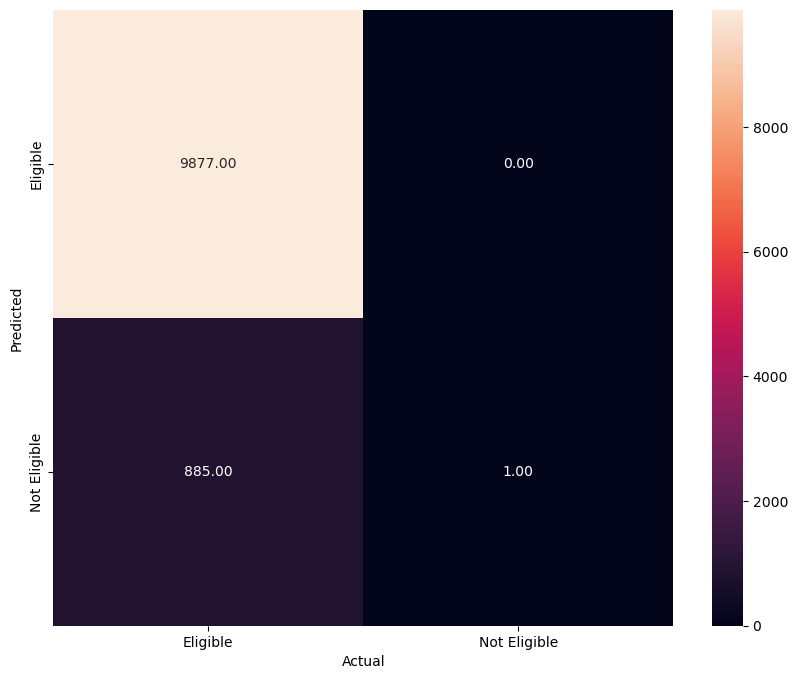

In [136]:
#Predicting for train set
Y_pred_train = logmodel.predict(X_train)

#checking the performance on the train dataset
metrics_score(Y_train, Y_pred_train)

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scipy

Check the performance on the train dataset

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4245
           1       0.00      0.00      0.00       368

    accuracy                           0.92      4613
   macro avg       0.46      0.50      0.48      4613
weighted avg       0.85      0.92      0.88      4613



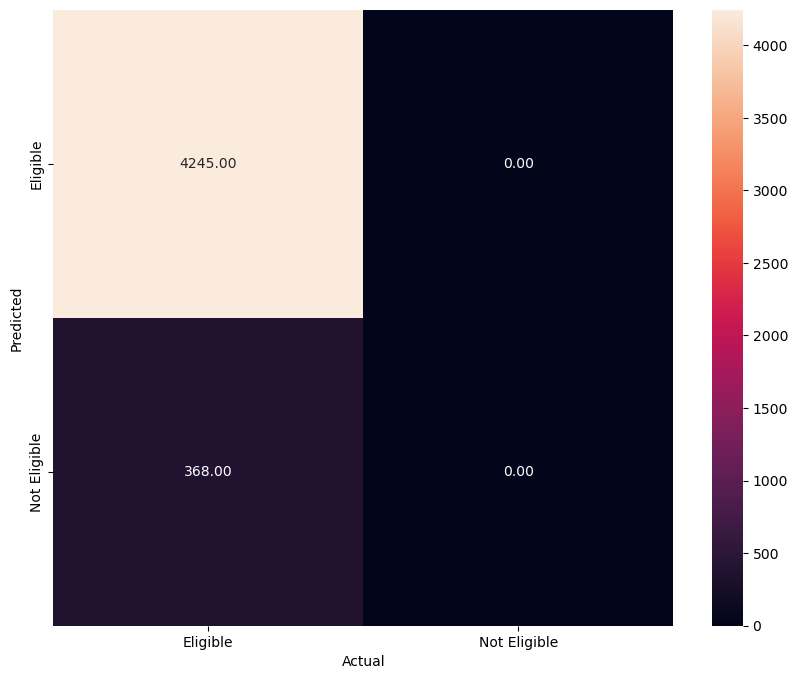

In [137]:
#Predicting for test set
Y_pred_test = logmodel.predict(X_test)

#checking the performance on the test dataset
metrics_score(Y_test, Y_pred_test)

Observations:

We are getting an accuracy of about 92% on the train and the test datasets.
However, the recall for this model is 0 for class 1 on both the train data and test data.
When the recall for class 1 is 0 in a classification report, it means that the model has failed to identify any of the actual positive instances of class 1. In other words, the model didn't correctly predict any of the true instances of class 1.
As we can see from the Confusion Matrix, this model is not good at identifying clients who are at risk of defaulting.

The Precision-Recall Curve for Logistic Regression

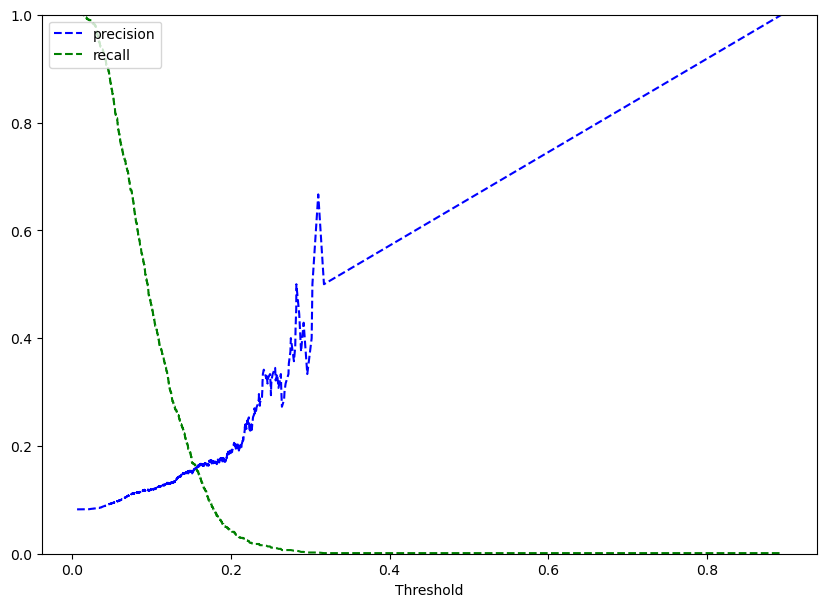

In [138]:
Y_scores_lg = logmodel.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_train, Y_scores_lg[:, 1])

import matplotlib.pyplot as plt
# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')
plt.ylim([0, 1])
plt.show()

Observation:

We can see that the precision and the recall are balanced for a threshold of about 0.18.

Let us find out the performance of the model at this threshold.

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9877
           1       0.17      0.08      0.11       886

    accuracy                           0.89     10763
   macro avg       0.55      0.52      0.52     10763
weighted avg       0.86      0.89      0.87     10763



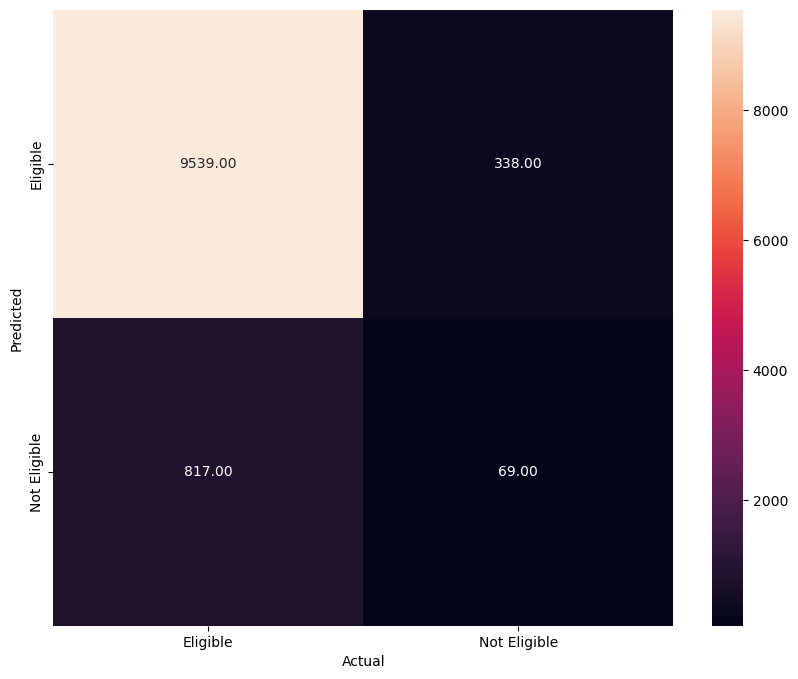

In [139]:
optimal_threshold1 = .18

Y_pred_train = logmodel.predict_proba(X_train)

metrics_score(Y_train, Y_pred_train[:, 1] > optimal_threshold1)

Observations:

The model performance has improved. The recall has increased significantly for class 1 to 8%.
    
Let us check the performance on the test data.

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4245
           1       0.12      0.05      0.07       368

    accuracy                           0.89      4613
   macro avg       0.52      0.51      0.51      4613
weighted avg       0.86      0.89      0.87      4613



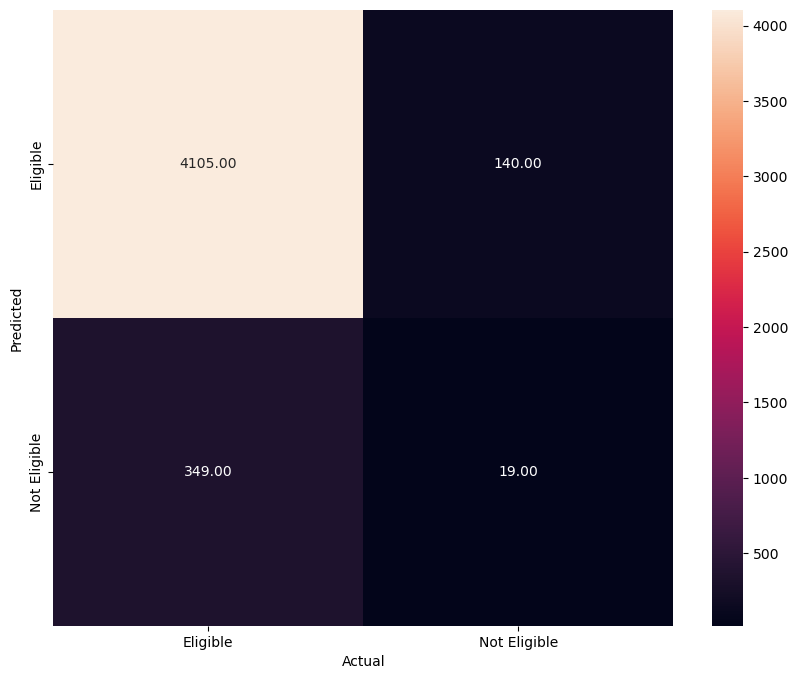

In [140]:
optimal_threshold1 = .18

Y_pred_test = logmodel.predict_proba(X_test)

metrics_score(Y_test, Y_pred_test[:, 1] > optimal_threshold1)

Observations:

The model is giving a similar performance on the test and the train datasets, i.e., the model is giving a generalized performance.
The recall of the test data has increased to 5% while at the same time, the accuracy has decreased slightly, which is to be expected while adjusting the threshold.
Nevertheless, Recall is still low

Build a Decision Tree Model

Data Preparation for the tree based model

In [131]:
numerical_columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)

In [132]:
import pandas as pd
X = loan_default_df[['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION','AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']]
Y = loan_default_df['TARGET']
# Convert continuous labels to discrete classes
Y = [int(label) for label in Y]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [33]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)
#fitting Decision tree model
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9877
           1       1.00      1.00      1.00       886

    accuracy                           1.00     10763
   macro avg       1.00      1.00      1.00     10763
weighted avg       1.00      1.00      1.00     10763



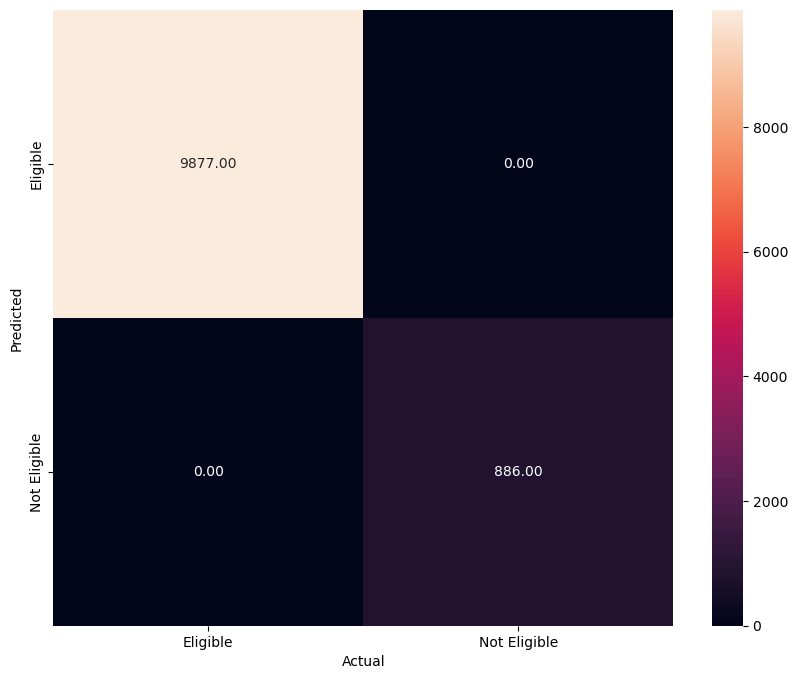

In [142]:
# Checking performance on the training data

Y_train_pred_dt = dt.predict(X_train)

metrics_score(Y_train, Y_train_pred_dt)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4245
           1       0.11      0.14      0.13       368

    accuracy                           0.84      4613
   macro avg       0.52      0.52      0.52      4613
weighted avg       0.86      0.84      0.85      4613



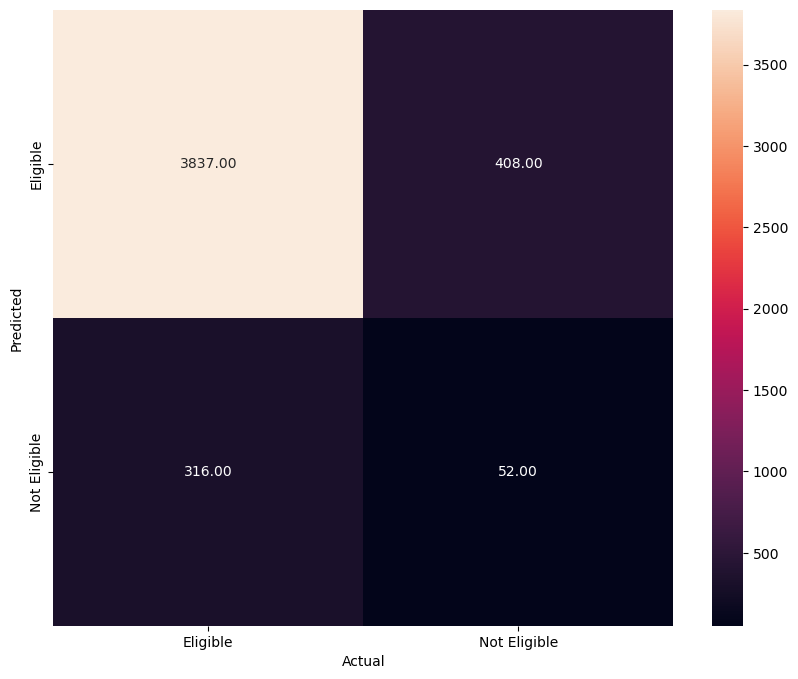

In [143]:
# Checking performance on the testing data

Y_test_pred_dt = dt.predict(X_test)

metrics_score(Y_test, Y_test_pred_dt)

Insights

The Decision Tree works well on the training data but not so well on the test data as the recall is 0.14 in comparison to 1.00 for the training dataset, i.e., the Decision Tree is overfitting the training data.
The precision on the test data suggests that there's a 16% (1 - 0.84) chance that the model will predict that a client is going to default even though he/she would not (false positive), increasing the risk for the bank to loses income.
The recall in this model is greater than in logistical regression: 0.14 vs. 0.0.

Decision Tree - Hyperparameter Tuning
We'll use Grid search to perform hyperparameter tuning.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Let's plot the feature importance and check the most important features.

<Axes: xlabel='Importance', ylabel='None'>

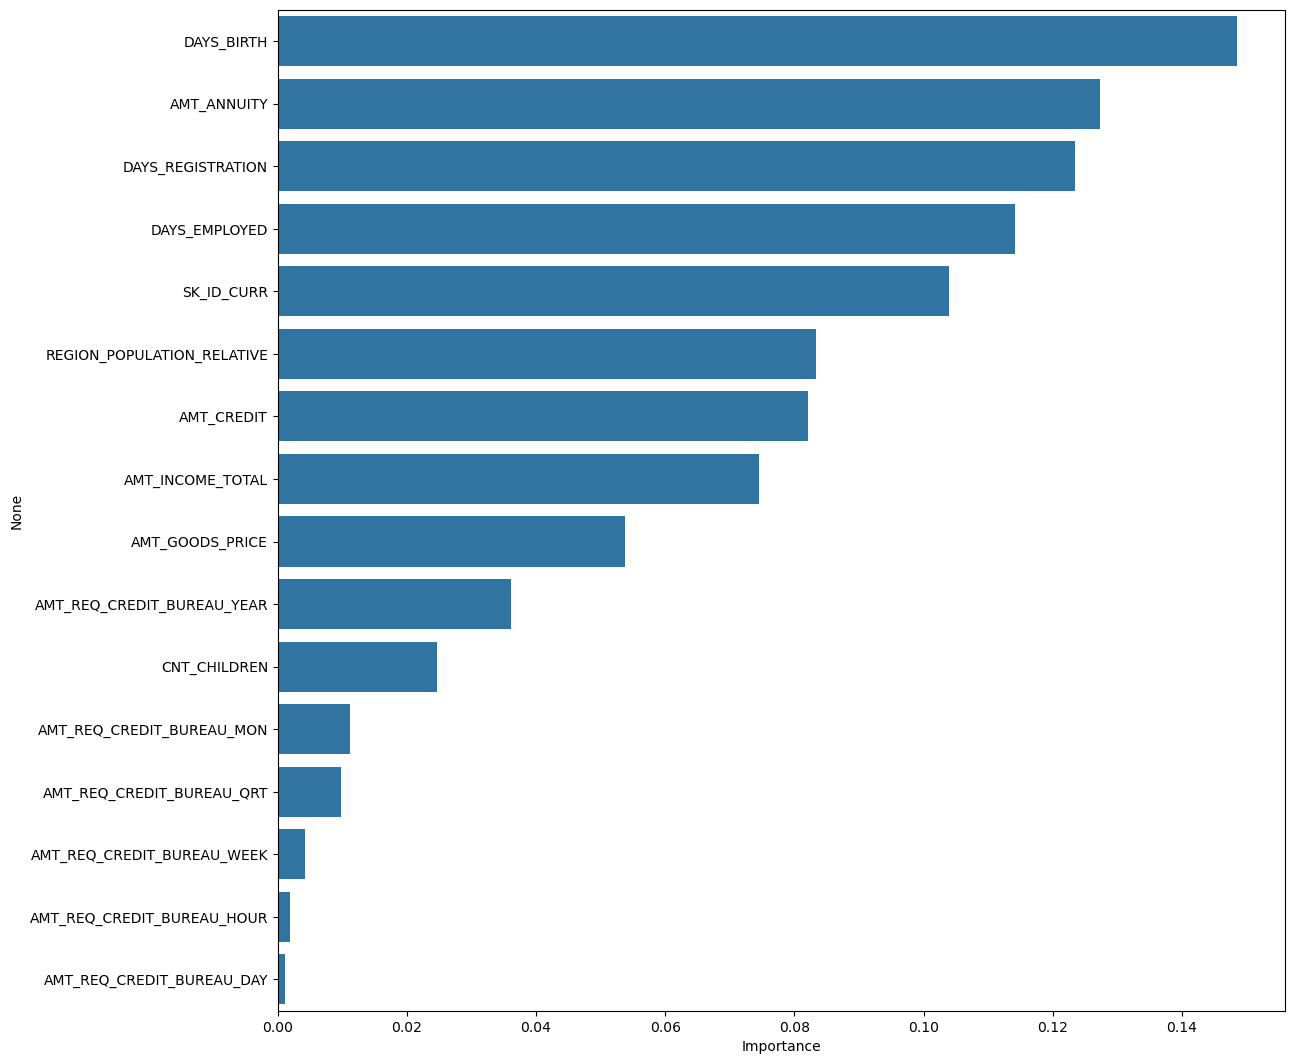

In [145]:
# Plotting the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x = importance_df.Importance, y = importance_df.index)

According to the Decision Tree, DEBTINC_missing_values_flag is the most important feature, followed by DEBTINC, CLAGE and LOAN.
This might signify that any client with no data in the DEBTINC ratio, will not receive any loan.
The other important features are MORTDUE, VALUE.

Using GridSearchCV for Hyperparameter tuning on the model

In [30]:
# Choosing the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)
import numpy as np
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)
# Fitting the GridSearch on train dataset
gridCV = gridCV.fit(X_train, Y_train)
# Setting the clf to the best combination of parameters
dtree_estimator = gridCV.best_estimator_
# Fitting the best algorithm to the data. 
dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=6,
                       min_samples_leaf=10, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9877
           1       0.27      0.10      0.15       886

    accuracy                           0.90     10763
   macro avg       0.60      0.54      0.55     10763
weighted avg       0.87      0.90      0.88     10763



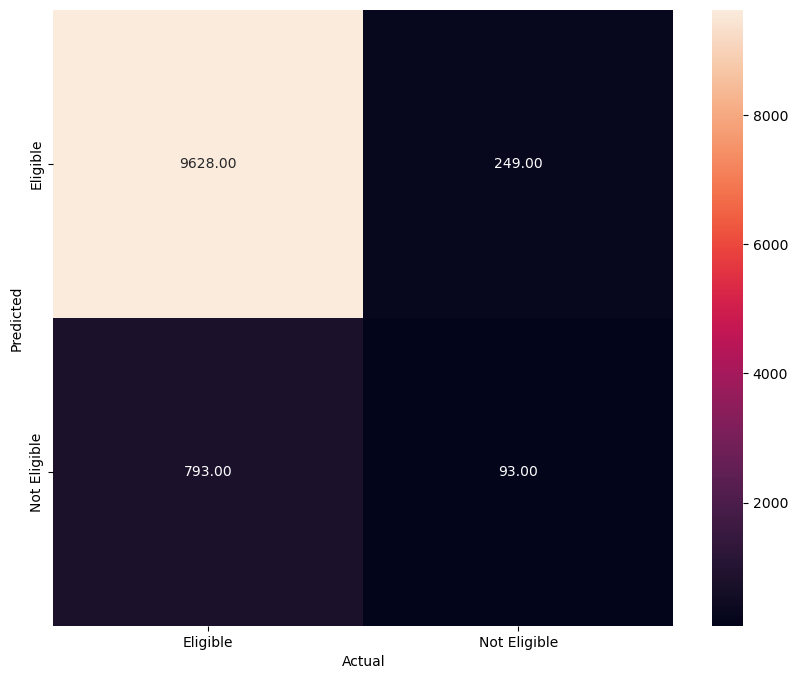

In [149]:
# Checking performance on the training data based on the tuned model

Y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(Y_train, Y_train_pred_dt)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4245
           1       0.12      0.05      0.07       368

    accuracy                           0.89      4613
   macro avg       0.52      0.51      0.51      4613
weighted avg       0.86      0.89      0.87      4613



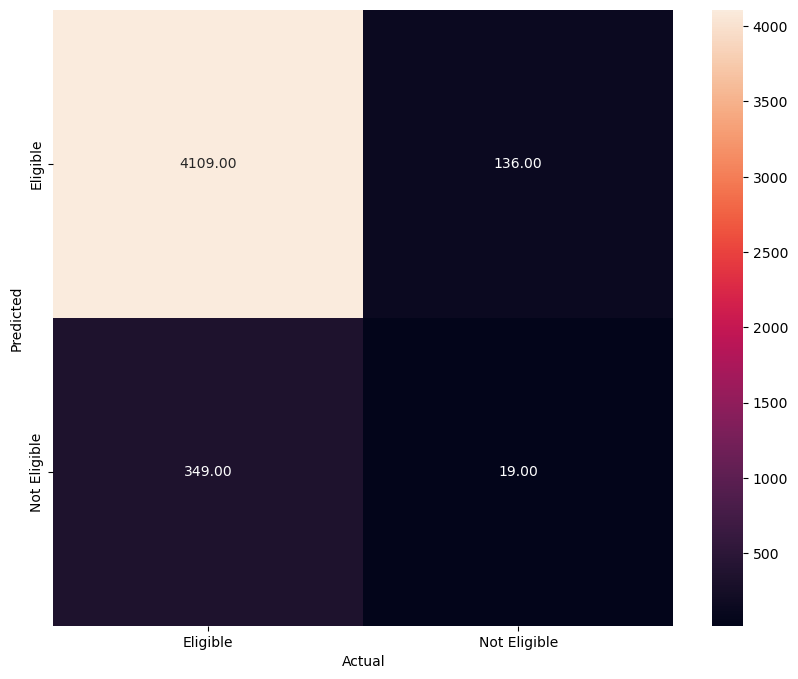

In [150]:
# Checking performance on the testing data based on the tuned model

Y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(Y_test, Y_test_pred_dt)

Insights

In comparison to the model with default values of hyperparameters, the performance on the training set has gone down significantly (1.00 to 0.10) This makes sense because we are trying to reduce overfitting.
The tuned model is performing well in comparison to the model with default values of hyperparameters: Recall decreases from 0.10 to 0.05 in test data.
This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
Precision has gone down significantly from 1.00 to 0.92 in comparison to the previous model which means the tuned model will give little false positives.

Let's look at the feature importance of this model and try to analyze why this is happening.

<Axes: xlabel='Importance', ylabel='None'>

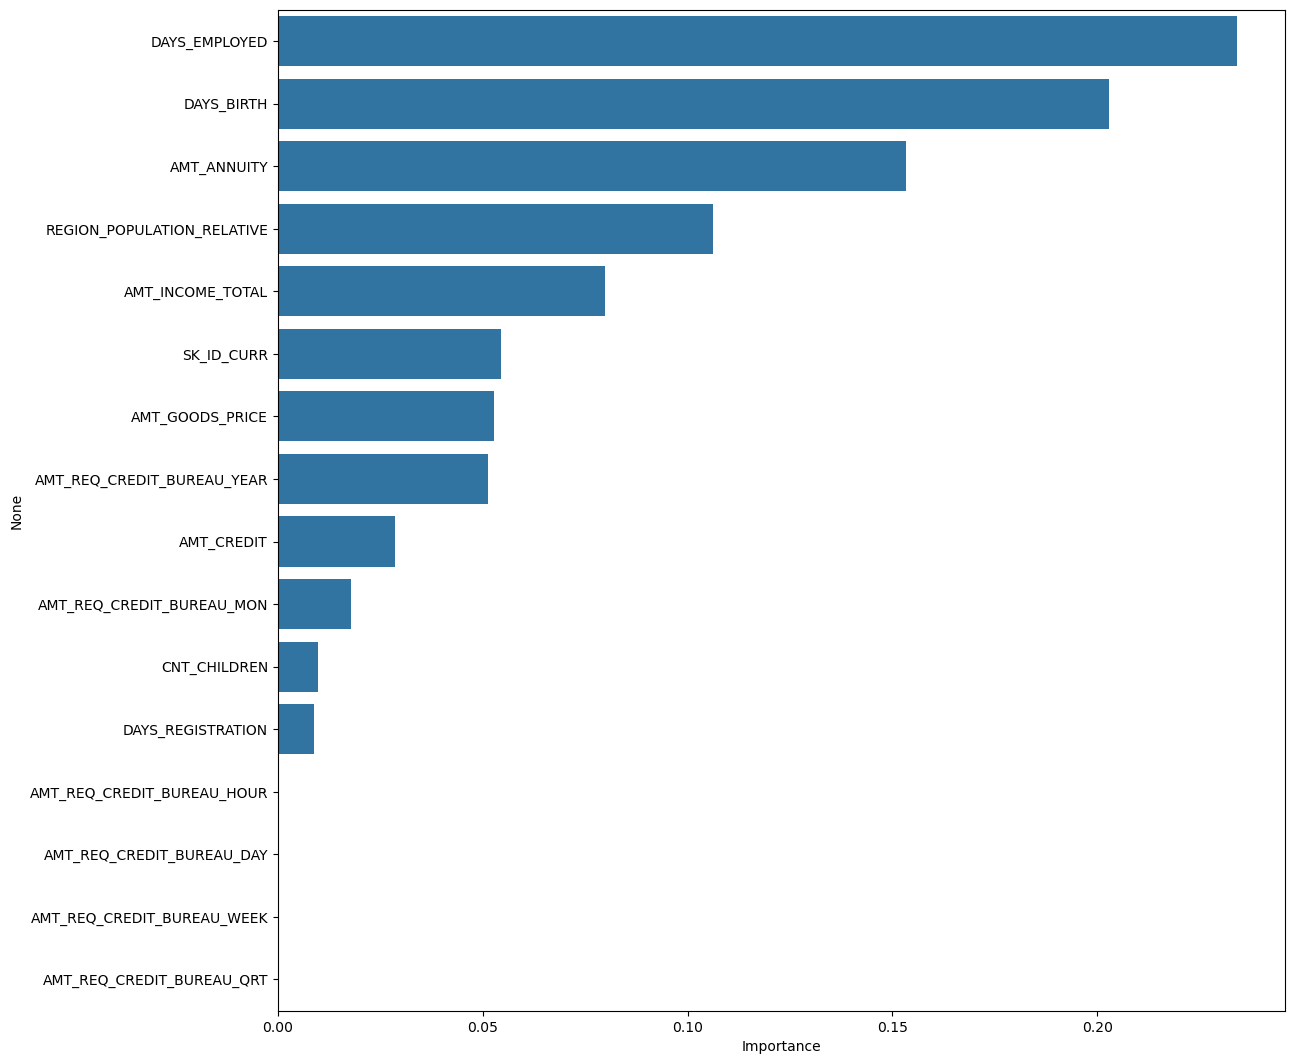

In [31]:
importances = dtree_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x = importance_df.Importance, y = importance_df.index)

Observations:

After tuning the model we are getting that only 8 features are important. It seems like the model is having high bias, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
According to this model too, DEBTINC_missing_value, DEBTINC, DELINQ, CLAGE, DEROG, CLNO, MORTDUEand YOG are the most important features that describe why a client is defaulting.

Plotting the Decision Tree

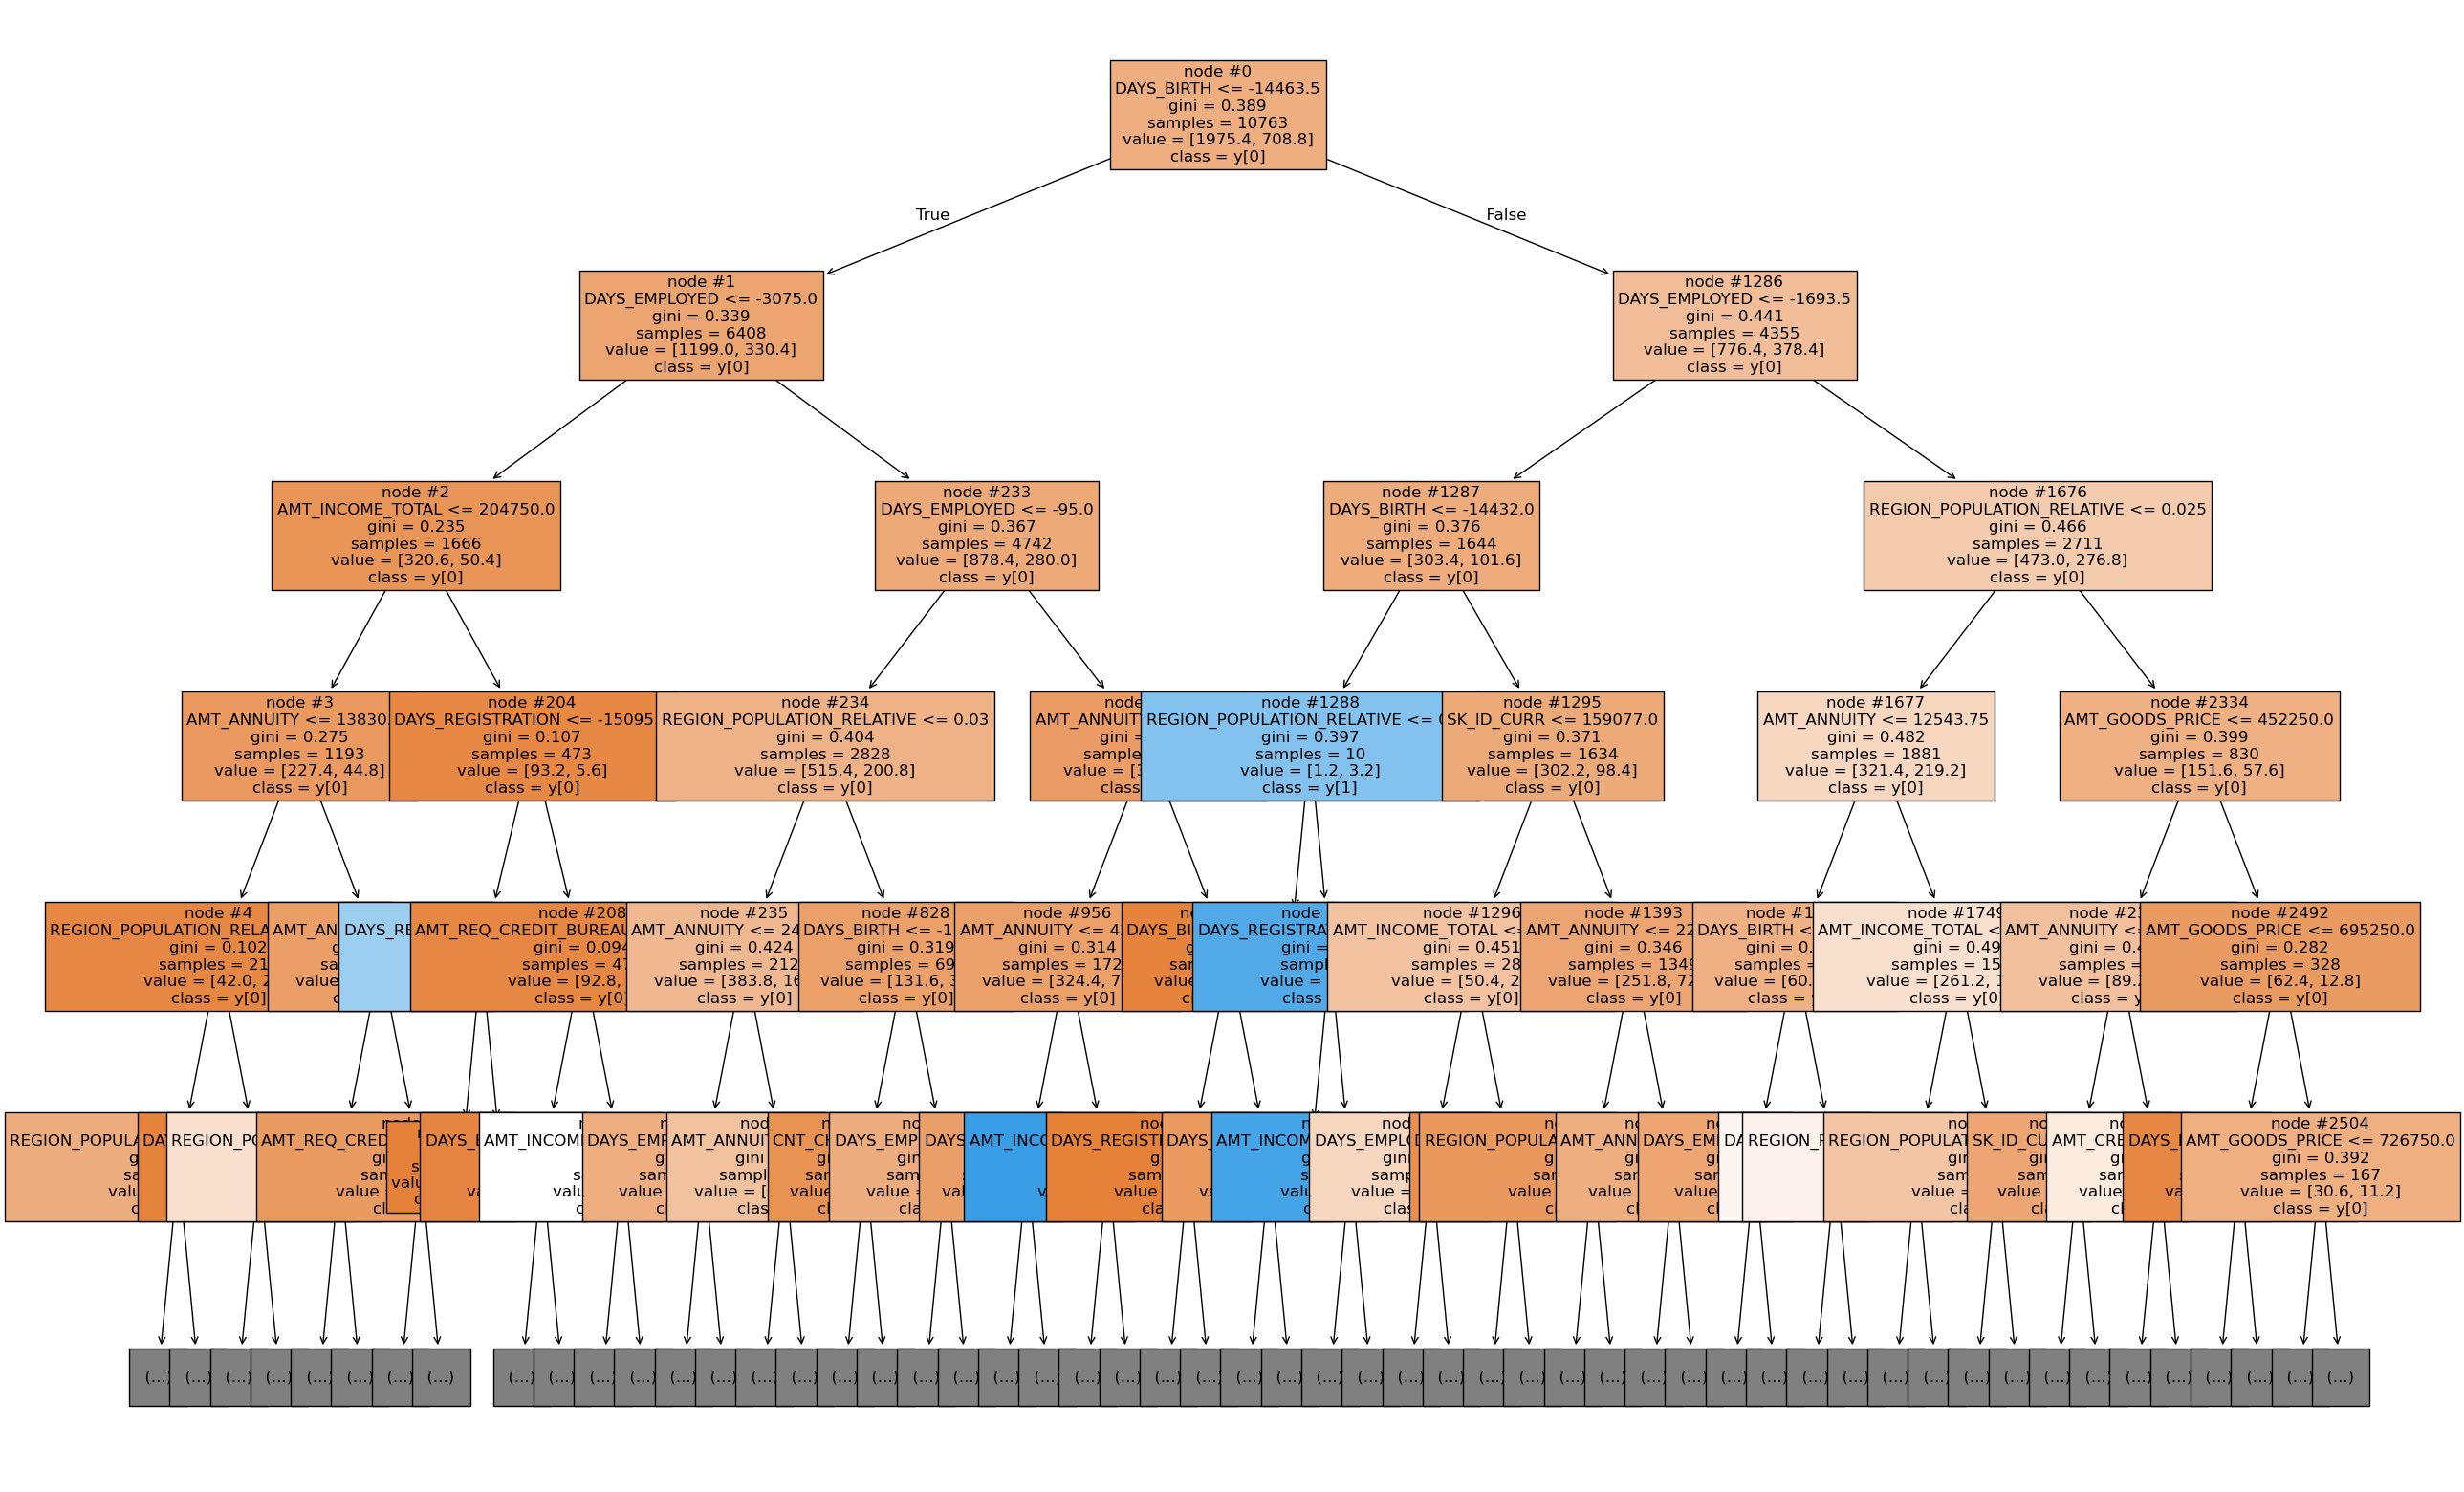

In [153]:
# Plotting the decision  tree and analyze it to build the decision rule

features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, max_depth = 5, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

Note:
Blue leaves represent the attrition, i.e., y[1] and the orange leaves represent the non-attrition, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets.

Business rules:

1. When DEBTINC ratio data isn't present and the client has delinquent credit lines and the age of the oldest credit line is smaller than 390.6 months, then the client have a hign chance to default.
2. When DEBTINC ratio data isn't present and the client doesn't have delinquent credit lines, he/she has a high chance to default.
3. If the DEBTINC ratio data is present and the DEBTINC ratio is greater than 43.7 and the age of the oldest credit line is smaller than 285.5 months, the client has a chance to default.
4. If the DEBTINC ratio data is present and the DEBTINC ratio is smaller than 43.7 but the client has derogatory reports, he/she has a chance to default.
5. If the DEBTINC ratio data is present and the DEBTINC ratio is smaller than 43.7 but VALUE isn't present, there is chance to default.
6. If the DEBTINC ratio data is present and the DEBTINC ratio is smaller than 43.7 and VALUE is present, there is a high chance to not default.
7. If the DEBTINC ratio data is present and the DEBTINC ratio is greater than 43.7 and the age of the oldest credit line is greater than 285.5 months, the client won't default.
8. When DEBTINC ratio data isn't present and the client has delinquent credit lines and the age of the oldest credit line is greater than 390.6 months, then the client won't default.

Building a Random Forest Classifier

In [6]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9877
           1       1.00      1.00      1.00       886

    accuracy                           1.00     10763
   macro avg       1.00      1.00      1.00     10763
weighted avg       1.00      1.00      1.00     10763



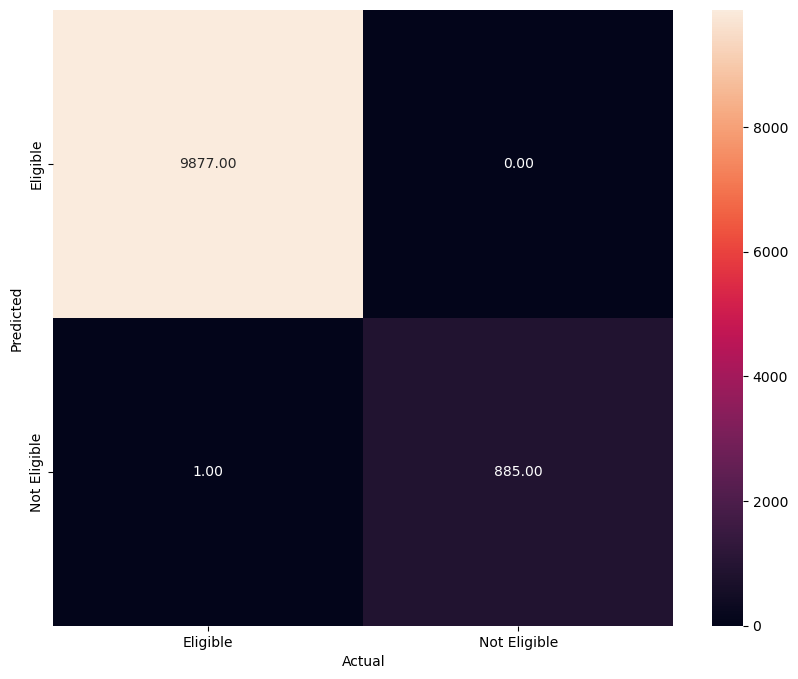

In [7]:
#Checking performance on the training data

Y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf)

Checking the performance on the test dataset

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4245
           1       0.00      0.00      0.00       368

    accuracy                           0.92      4613
   macro avg       0.46      0.50      0.48      4613
weighted avg       0.85      0.92      0.88      4613



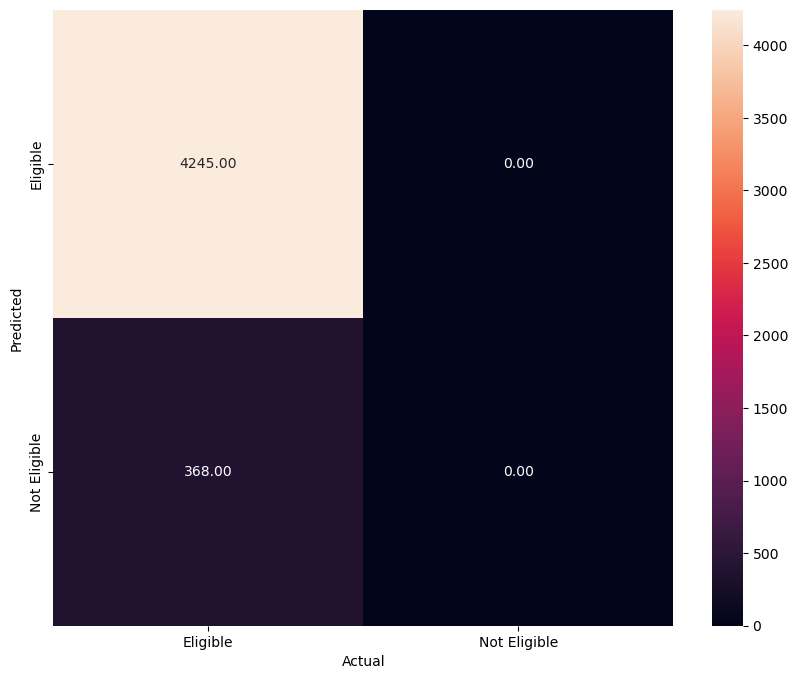

In [8]:
# Checking performance on the test data

Y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf)

Observations:

The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only 0.0 for class 1 (lower than the tuned Decision Tree).
Precision is high for the test data as well.

Build a Random Forest model with Class Weights

In [12]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator = RandomForestClassifier(class_weight = {0: 0.5, 1: 0.5}, random_state = 1)

# Fitting Random Forest model
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9877
           1       1.00      1.00      1.00       886

    accuracy                           1.00     10763
   macro avg       1.00      1.00      1.00     10763
weighted avg       1.00      1.00      1.00     10763



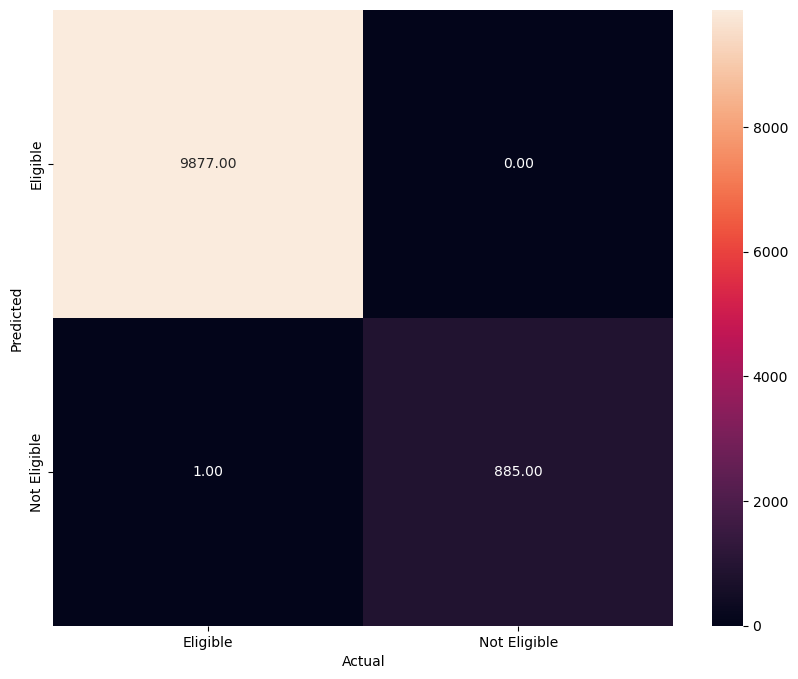

In [13]:
# Checking performance on the train data

Y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf)

Checking the performance on the test dataset

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4245
           1       0.00      0.00      0.00       368

    accuracy                           0.92      4613
   macro avg       0.46      0.50      0.48      4613
weighted avg       0.85      0.92      0.88      4613



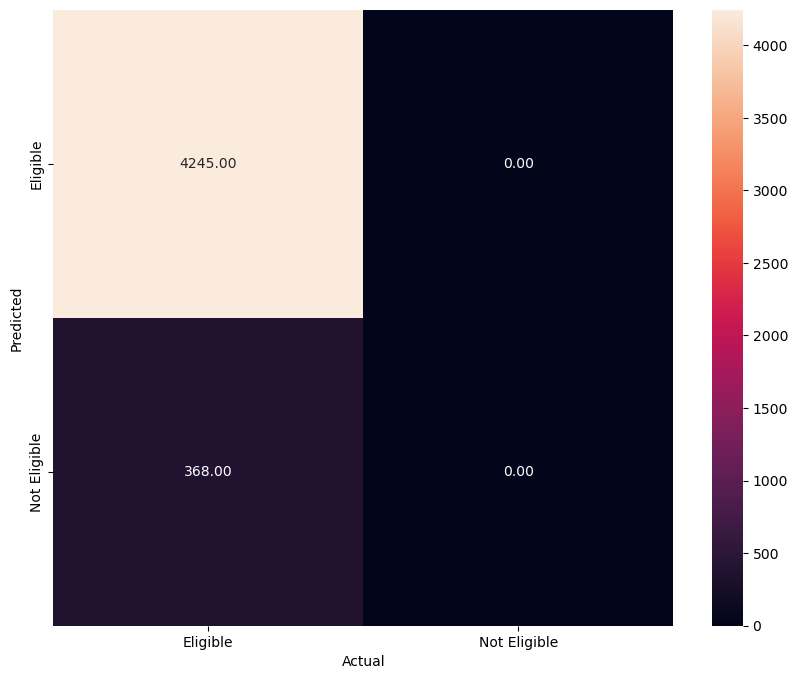

In [14]:
# Checking performance on the test data

Y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf)

Observations

The random forest classifier is still overfitting in the training data.
Recall decreased from 1.00 to 0.00
Precision is still high for the test data as well.
Using class_weight={0: 0.2, 1: 0.8} got worse results. When we increase class weight for class 0, recall does not improve. 

Plot the Feature importance of the Random Forest

<Axes: xlabel='Importance', ylabel='None'>

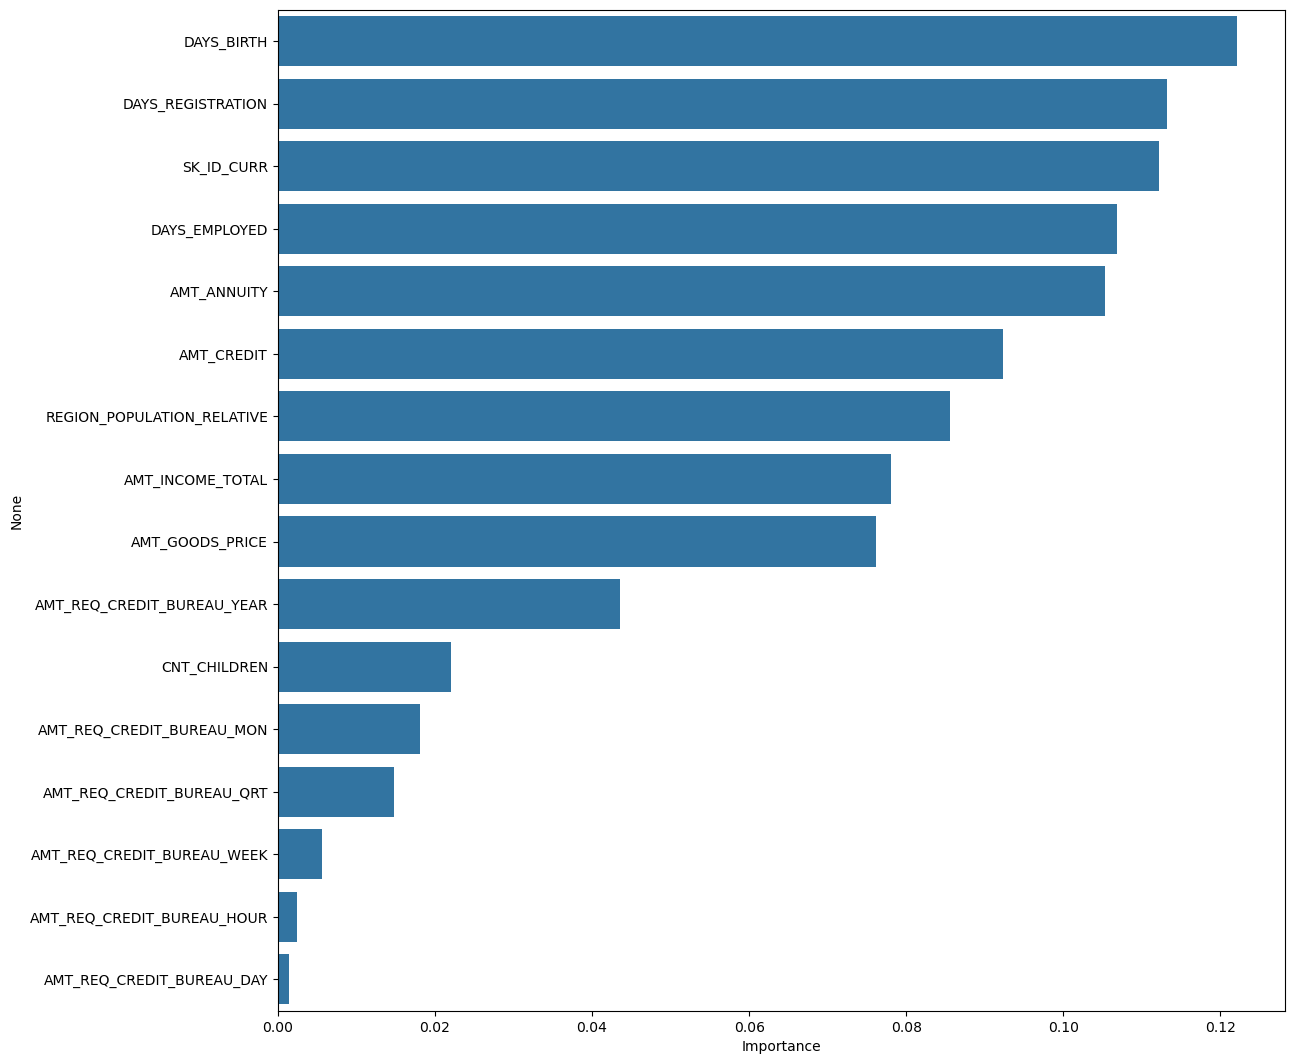

In [15]:
# importance of features in the tree building
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

Tuning the Random Forest
We'll use Grid search to perform hyperparameter tuning.
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
It is an exhaustive search that is performed on the specific parameter values of a model.
The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [17]:
# Choosing the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state = 1)
import numpy as np
# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

#fitting the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, Y_train)

# Setting the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fitting the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, Y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\

RandomForestClassifier(max_features=0.9, n_estimators=500, random_state=1)

Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9877
           1       1.00      1.00      1.00       886

    accuracy                           1.00     10763
   macro avg       1.00      1.00      1.00     10763
weighted avg       1.00      1.00      1.00     10763



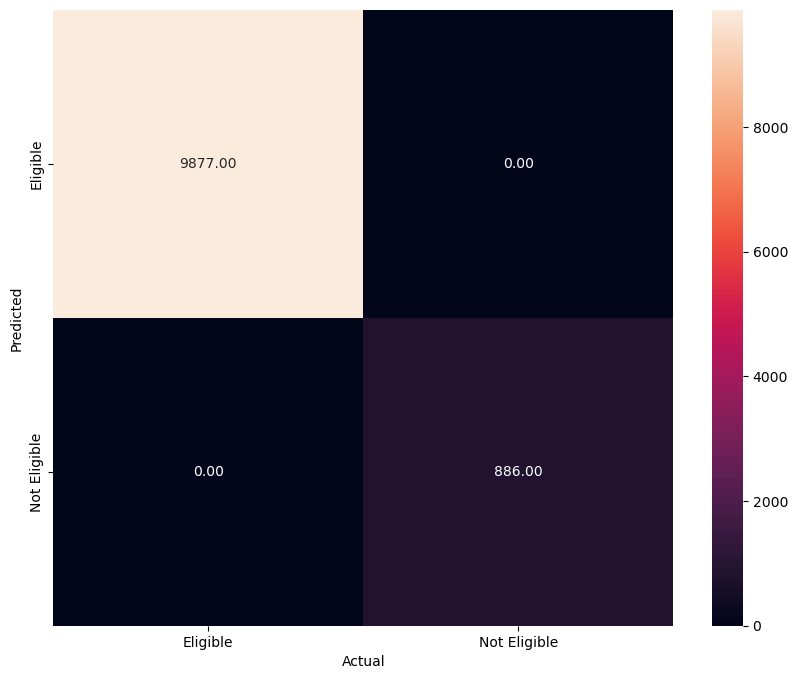

In [18]:
# Checking performance on the training data
Y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(Y_train, Y_pred_train_rf_tuned)

Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4245
           1       1.00      0.00      0.01       368

    accuracy                           0.92      4613
   macro avg       0.96      0.50      0.48      4613
weighted avg       0.93      0.92      0.88      4613



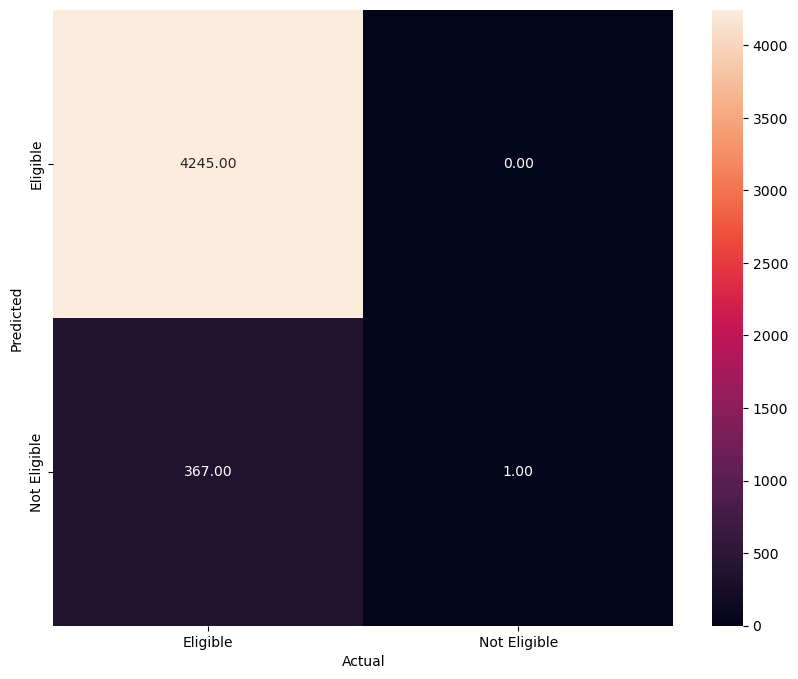

In [19]:
# Checking performace on test dataset
Y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(Y_test, Y_pred_test_rf_tuned)

Insights:
The recall for class 1 did not improve in comparison to non-tuned random forest model.

Plotting the Feature importance of the tuned Random Forest

<Axes: xlabel='Importance', ylabel='None'>

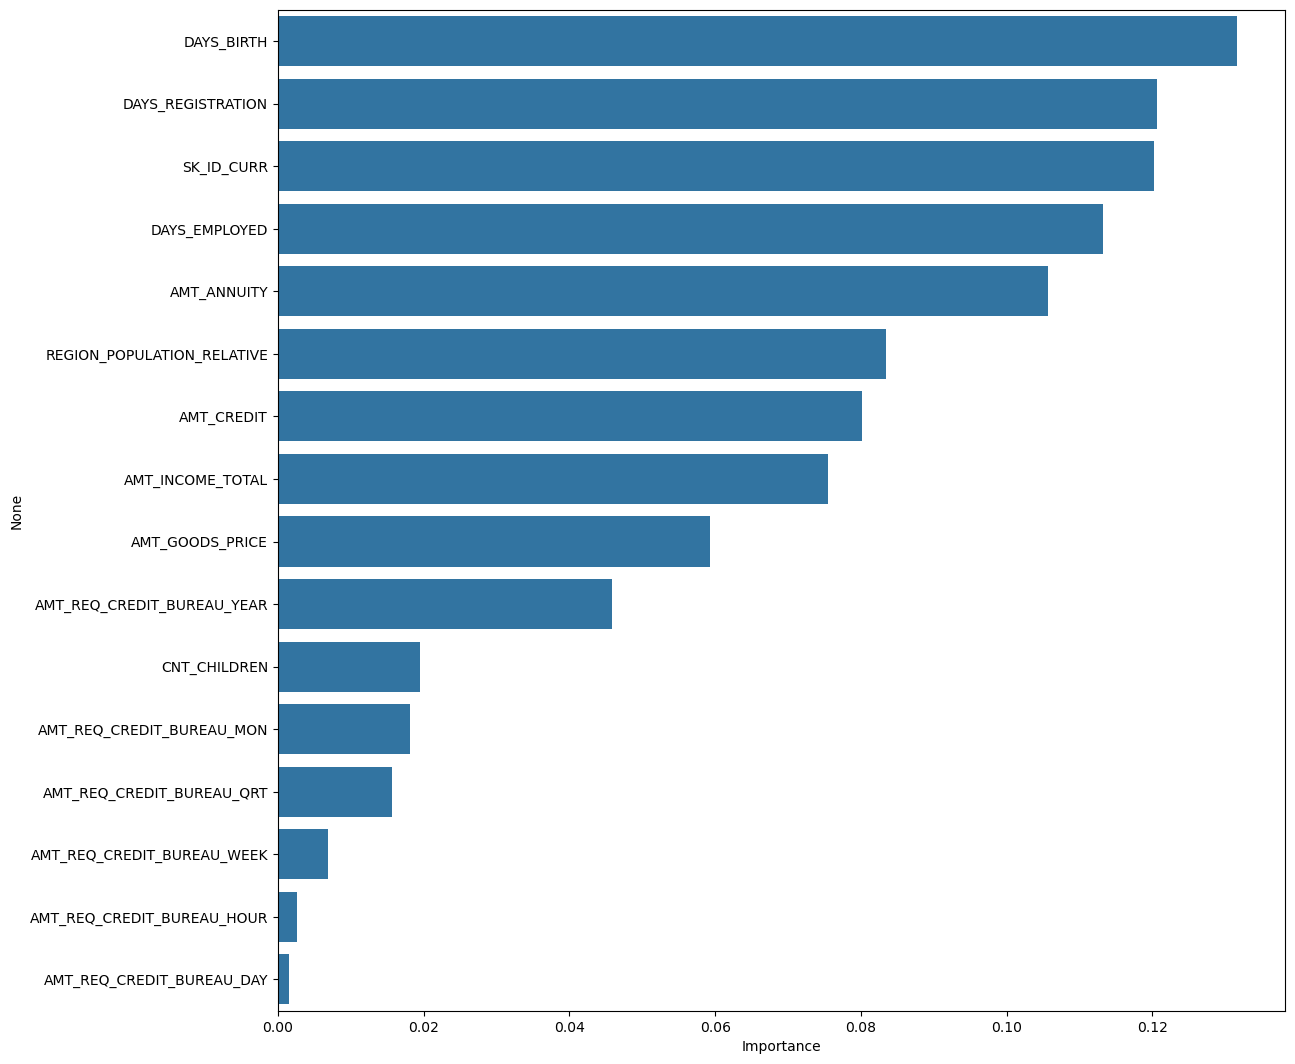

In [20]:
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x = importance_df.Importance, y = importance_df.index)

Observations

The feature importance plot for the base model and tuned model are quite similar. The model seems to suggest that DAYS_BIRTH, DAYS_REGISTRATION, SK_ID_CURR, DAYS_EMPLOYED and AMT_ANNUITY are the most important features.
Other important features are REGION_POPULATION_RELATIVE, AMT_CREDIT, AMT_INCOME_TOTAL, and AMT_GOODS_PRICE.

Comparing Model Performances

In [25]:
def get_recall_score(model,flag=True, X1_train = X_train, X1_test = X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X1_train)
    pred_test = model.predict(X1_test)
    train_recall = metrics.recall_score(Y_train,pred_train)
    test_recall = metrics.recall_score(Y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(Y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(Y_test,pred_test))
    
    return a # returning the list with train and test scores

In [26]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X1_train = X_train, X1_test = X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X1_train)
    pred_test = model.predict(X1_test)
    train_precision = metrics.precision_score(Y_train,pred_train)
    test_precision = metrics.precision_score(Y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(Y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(Y_test,pred_test))

    return b # returning the list with train and test scores

In [27]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X1_train = X_train, X1_test = X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X1_train,Y_train)
    test_acc = model.score(X1_test,Y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X1_train,Y_train))
        print("Accuracy on test set : ",model.score(X1_test,Y_test))
    
    return c # returning the list with train and test scores

In [34]:
# Making the list of all the model names 

#models = [lg, dt, dtree_estimator, rf_estimator, rf_estimator_tuned]
models = [rf_estimator_tuned, rf_estimator, dtree_estimator, dt]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    
     # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Mentioning the Model names in the list. 
comparison_frame = pd.DataFrame({'Model':['Tuned Random Forest', 'Random Forest', 'Tuned Decision Tree', 'Decision Tree'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Tuned Random Forest,1.000000,0.920442,1.000000,0.002717,1.000000,1.000000
1,Random Forest,0.999907,0.920225,0.998871,0.000000,1.000000,0.000000
2,Tuned Decision Tree,0.905324,0.897464,0.106095,0.043478,0.292835,0.116788
3,Decision Tree,0.999628,0.849122,0.997743,0.152174,0.997743,0.127273


Insights:

Models with the higher test accuracy are the Random Forest and Tuned Random Forest alomost 0.90.
All models overfit the training data with the exception of the Tuned Decision Tree.
The highest recall (almost 0.16) belongs to the Decision Tree. The others are similars.
Precision in Tuned Random Forest models are similar and high (1.00). Is also higher than Decision Tree models.
Precision in the Decision Tree is higher than in the Tuned Decision Tree (almost 0.99 vs almost 0.29).